# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Load The Data](#Load_The_Data)
  * [Explore The Data](#Explore_The_Data)
  * [Feature correlation heatmap](#Feature_correlation_heatmap')
  * [Summary](#Summary)


## Introduction<a id='Introduction'></a>

At this Exploratory Data analysis step feature relationship is evaluated.The features that are likely to have the most impact in modeling based on relationships between the features and the response variable are identified. 
SCaled features are compared with original feature with help of hist plot.
Pearson correlation coefficients and other statistical methods were used to identify statistical relationship strengths.

## Imports<a id='Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab

## Load The Data<a id='Load_The_Data'></a>

### Credit Card Customer Attrition data<a id='3.4.1_CCAttr_data'></a>

In [2]:
ccattr_data = pd.read_csv('../data/2.ccattr_data_cleaned.csv')

In [3]:
ccattr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLIENTNUM                       10127 non-null  int64  
 1   Attrition_Flag                  10127 non-null  object 
 2   Customer_Age                    10127 non-null  int64  
 3   Gender                          10127 non-null  object 
 4   Dependent_count                 10127 non-null  int64  
 5   Education_Level                 10127 non-null  object 
 6   Marital_Status                  10127 non-null  object 
 7   Income_Category                 10127 non-null  object 
 8   Card_Category                   10127 non-null  object 
 9   Months_on_book                  10127 non-null  int64  
 10  Total_Relationship_Count        10127 non-null  int64  
 11  Months_Inactive_12_mon          10127 non-null  int64  
 12  Contacts_Count_12_mon           

In [4]:
ccattr_data.head(3)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Trans_Amt_divMedian,Credit_Limit_log,Avg_Open_To_Buy_log,Total_Trans_Amt_log,Total_Revolving_Bal_log1p,Total_Trans_Ct_SqRT,Credit_Limit_SqRT,Total_Revolving_Bal_SqRT,Avg_Open_To_Buy_SqRT,Total_Trans_Amt_SqRT
0,714648933,Existing Customer,55,F,3,Graduate,Married,Unknown,Blue,36,...,0.399077,8.488999,8.226306,7.349874,7.024649,6.324555,69.720872,33.511192,61.139185,39.446166
1,717628608,Existing Customer,37,M,3,Unknown,Married,$60K - $80K,Blue,29,...,0.658630,7.853993,6.841615,7.850883,7.403061,5.830952,50.754310,40.496913,30.594117,50.675438
2,711777633,Existing Customer,41,M,3,Graduate,Divorced,$60K - $80K,Blue,27,...,1.070274,8.662851,8.662851,8.336390,0.000000,8.944272,76.052613,0.000000,76.052613,64.598762


## Explore The Data<a id='Explore_The_Data'></a>

**Distribution Comparison**

In [5]:
#Generic function to plot dynamically
def Distribution_Comparison(list_cols,Cols):
    Tot = len(list_cols)
    # Compute Rows required
    Rows = Tot // Cols 
    Rows += Tot % Cols
    # Create a Location index
    location = range(1,Tot + 1)
    fig = plt.figure(1)
    fig = plt.figure(figsize=(25, 12))
    for k in range(Tot):
        # add every single subplot to the figure with a for loop
        fig.suptitle(list_cols[0], fontsize=25)
        ax = fig.add_subplot(Rows,Cols,location[k])
        ax = sns.histplot(x=ccattr_data[list_cols[k]], kde=True, bins = 40,color="crimson")
        ax.set_xlabel(list_cols[k], fontsize = 18)
        ax.set_ylabel('Count', fontsize = 18)
plt.show()

<Figure size 640x480 with 0 Axes>

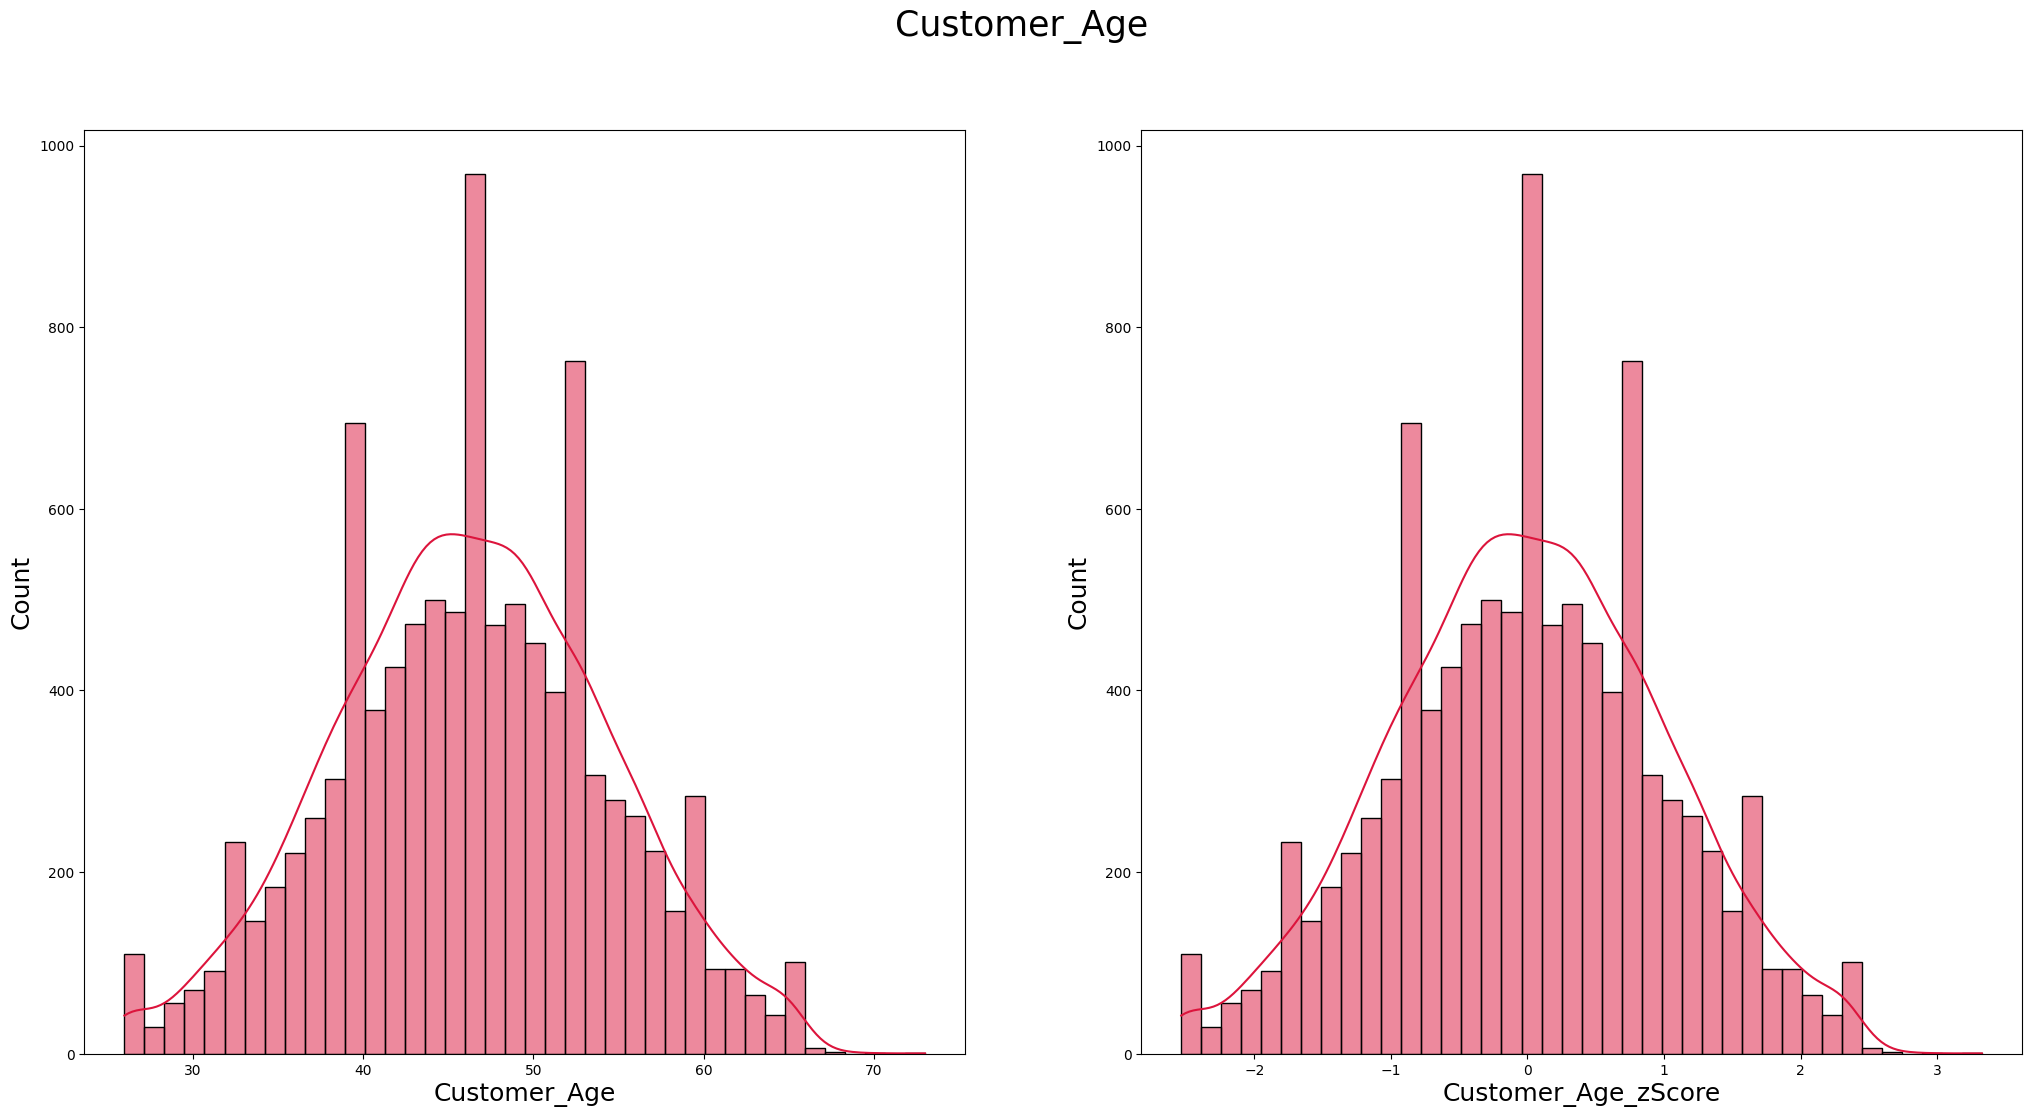

In [6]:
#Customer age - Distribution Camparison with zScore Scaling
list_col =  ['Customer_Age', 'Customer_Age_zScore']
Distribution_Comparison(list_col,2)

Customer Age is normally distributed and looks good.

<Figure size 640x480 with 0 Axes>

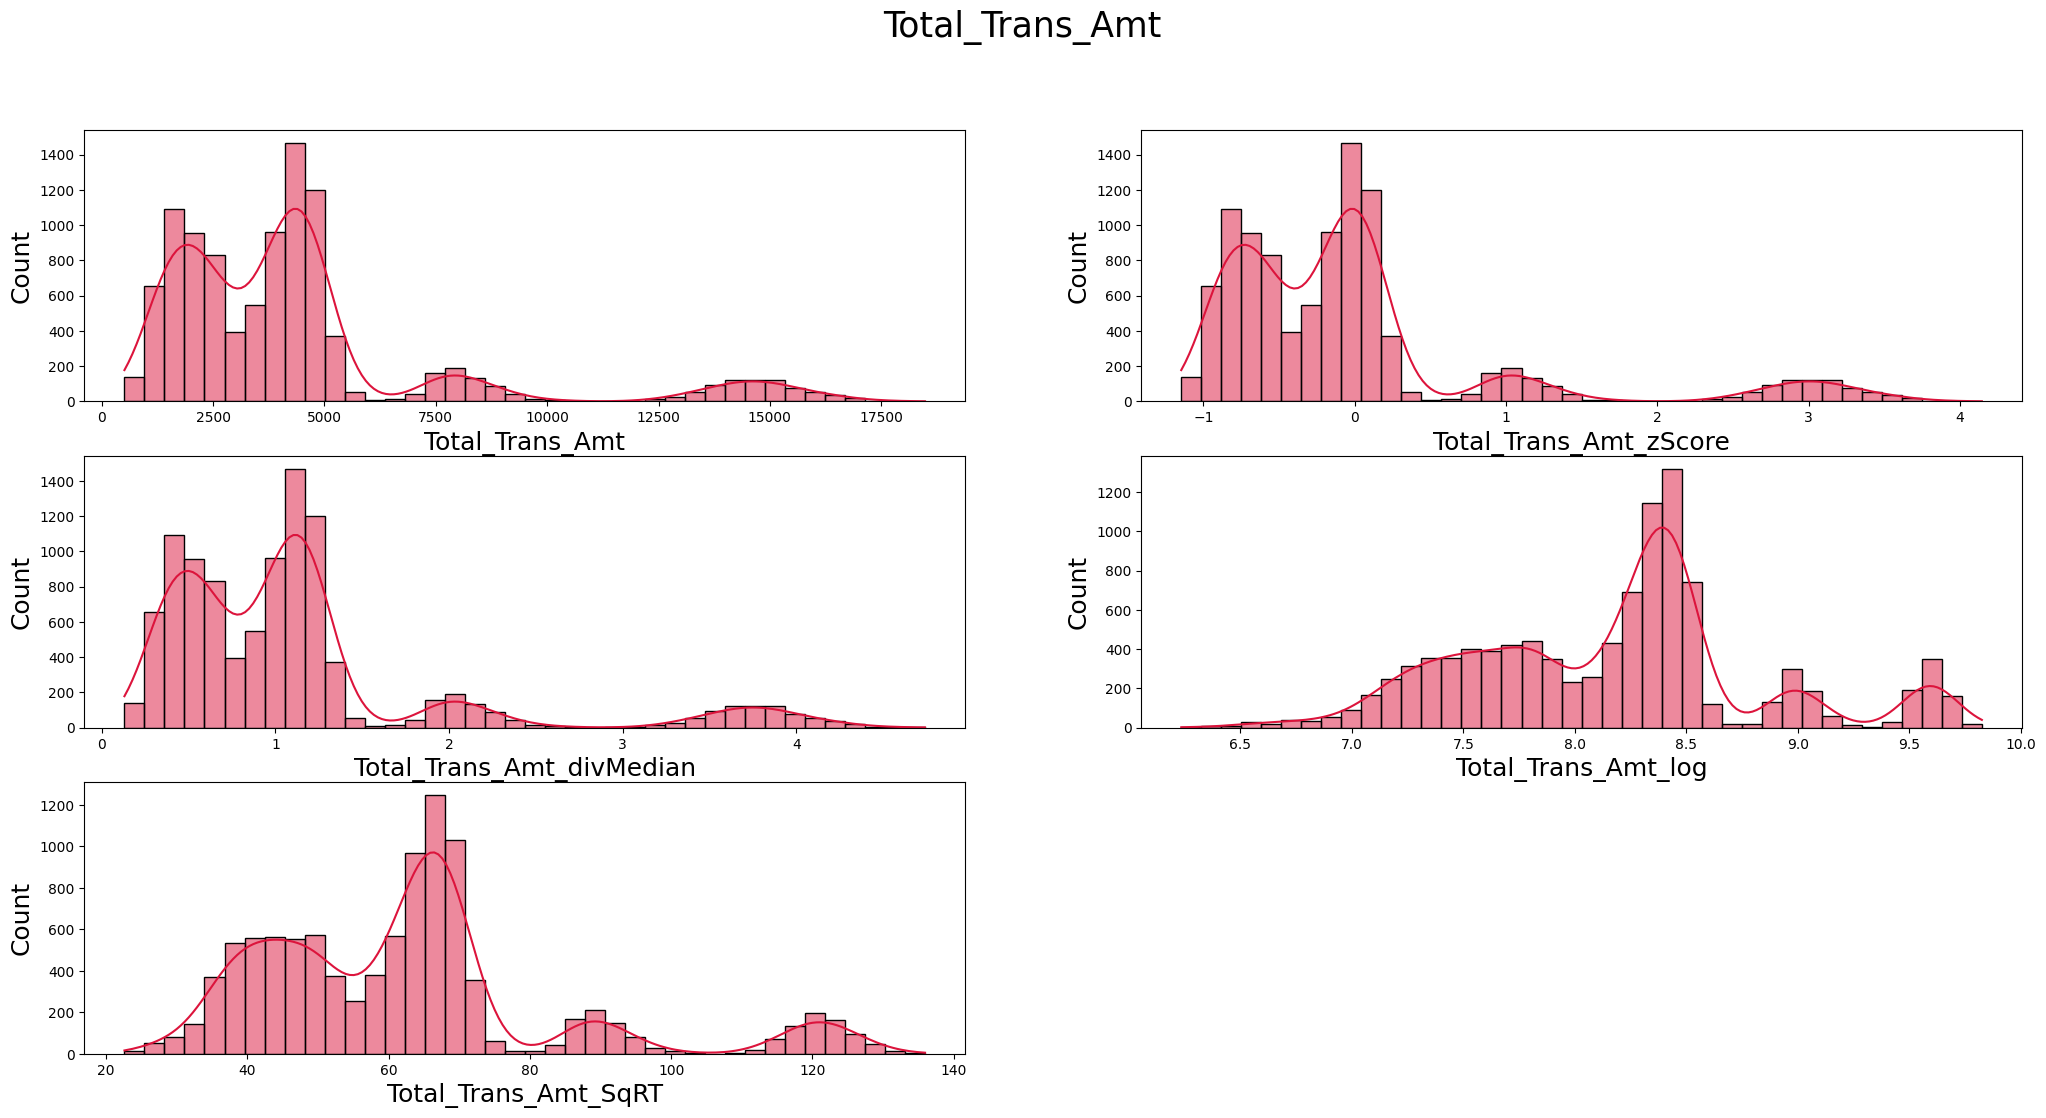

In [7]:
#Total_Trans_Amt - Distribution Camparison with zScore,div Median and log Scaling
list_col =  ['Total_Trans_Amt', 'Total_Trans_Amt_zScore','Total_Trans_Amt_divMedian','Total_Trans_Amt_log','Total_Trans_Amt_SqRT']
Distribution_Comparison(list_col,2)

<Figure size 640x480 with 0 Axes>

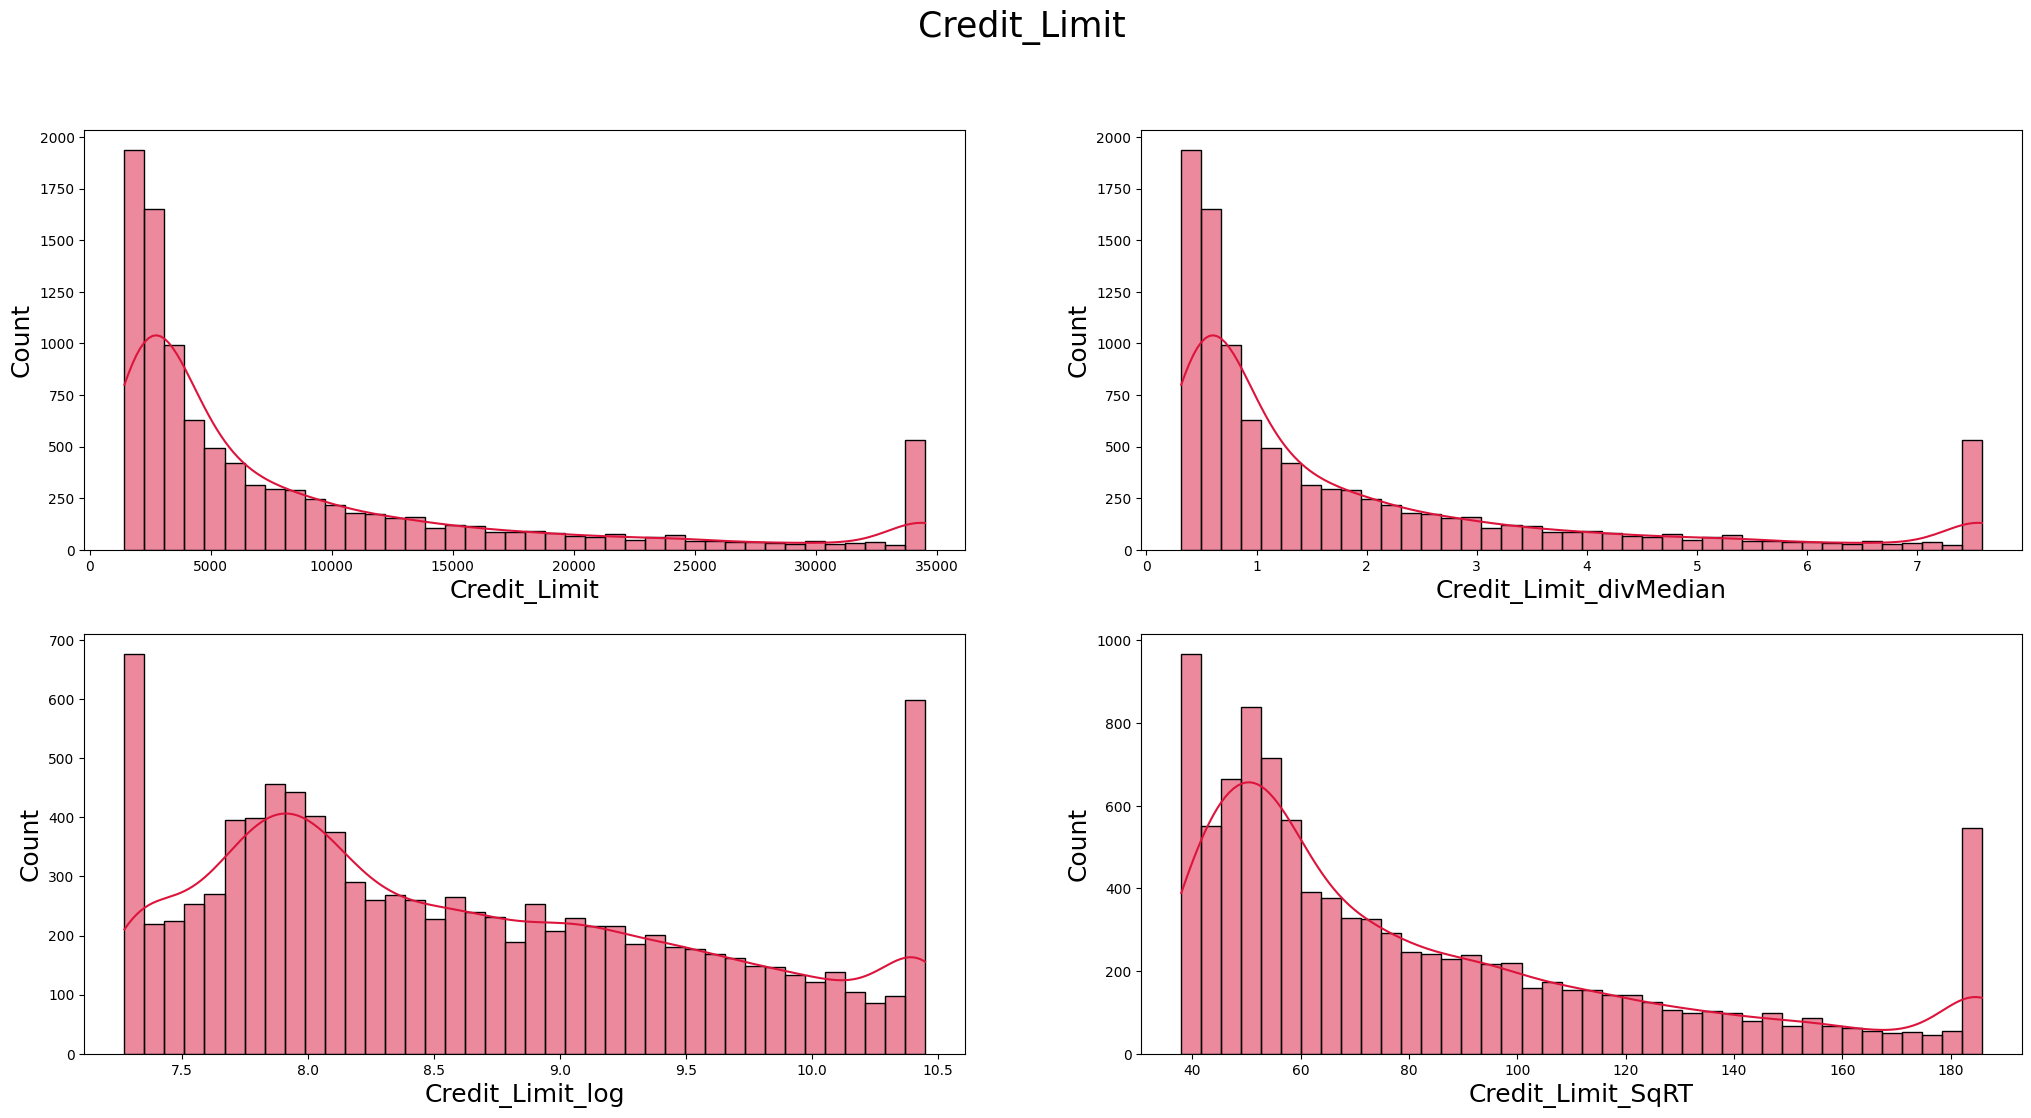

In [8]:
#Credit_Limit - Distribution Camparison with div Median and log Scaling
list_col =  ['Credit_Limit', 'Credit_Limit_divMedian','Credit_Limit_log','Credit_Limit_SqRT']
Distribution_Comparison(list_col,2)

<Figure size 640x480 with 0 Axes>

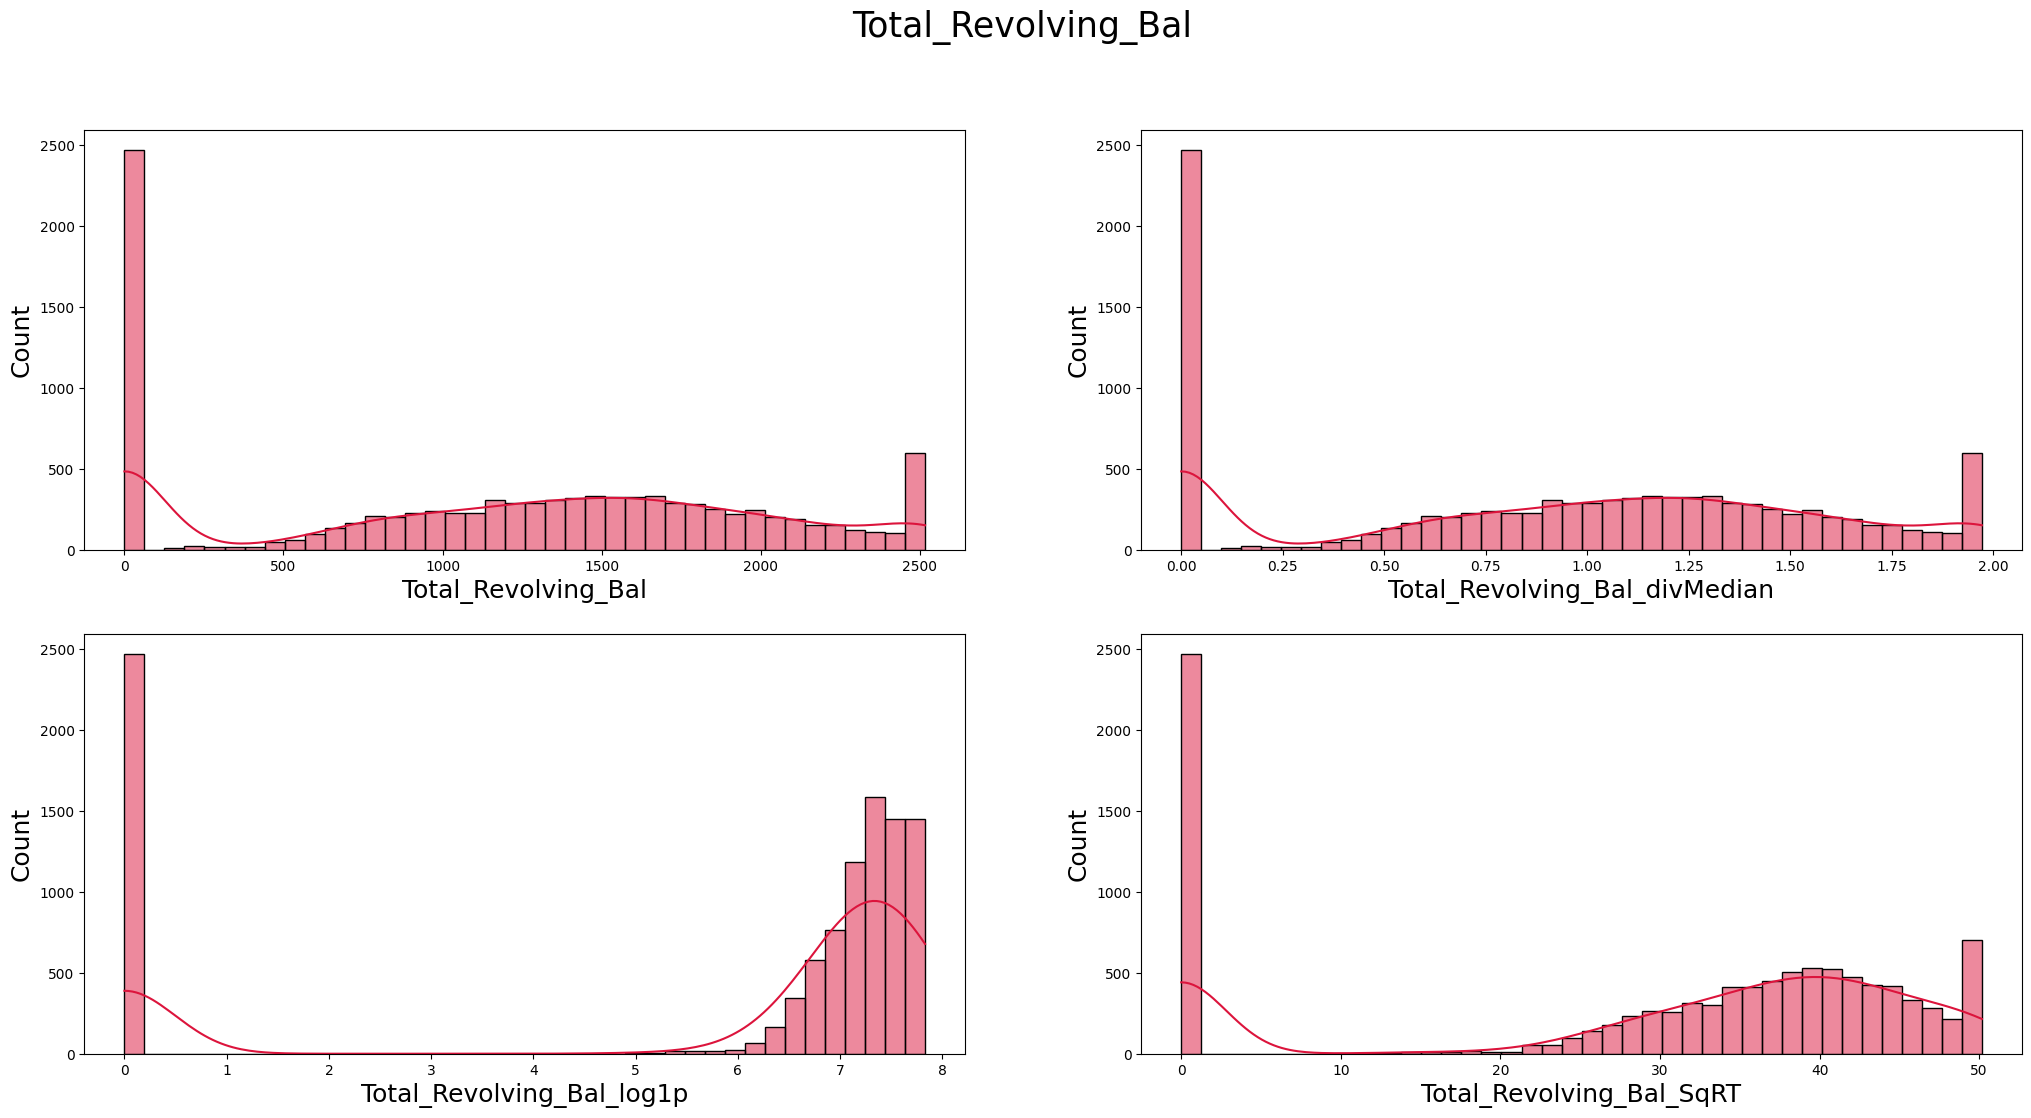

In [9]:
#Total_Revolving_Bal - Distribution Camparison with div Median and log1p Scaling
#Total_Revolving_Bal - The balance that carries over from one month to the next
list_col =  ['Total_Revolving_Bal', 'Total_Revolving_Bal_divMedian','Total_Revolving_Bal_log1p','Total_Revolving_Bal_SqRT']
Distribution_Comparison(list_col,2)

<Figure size 640x480 with 0 Axes>

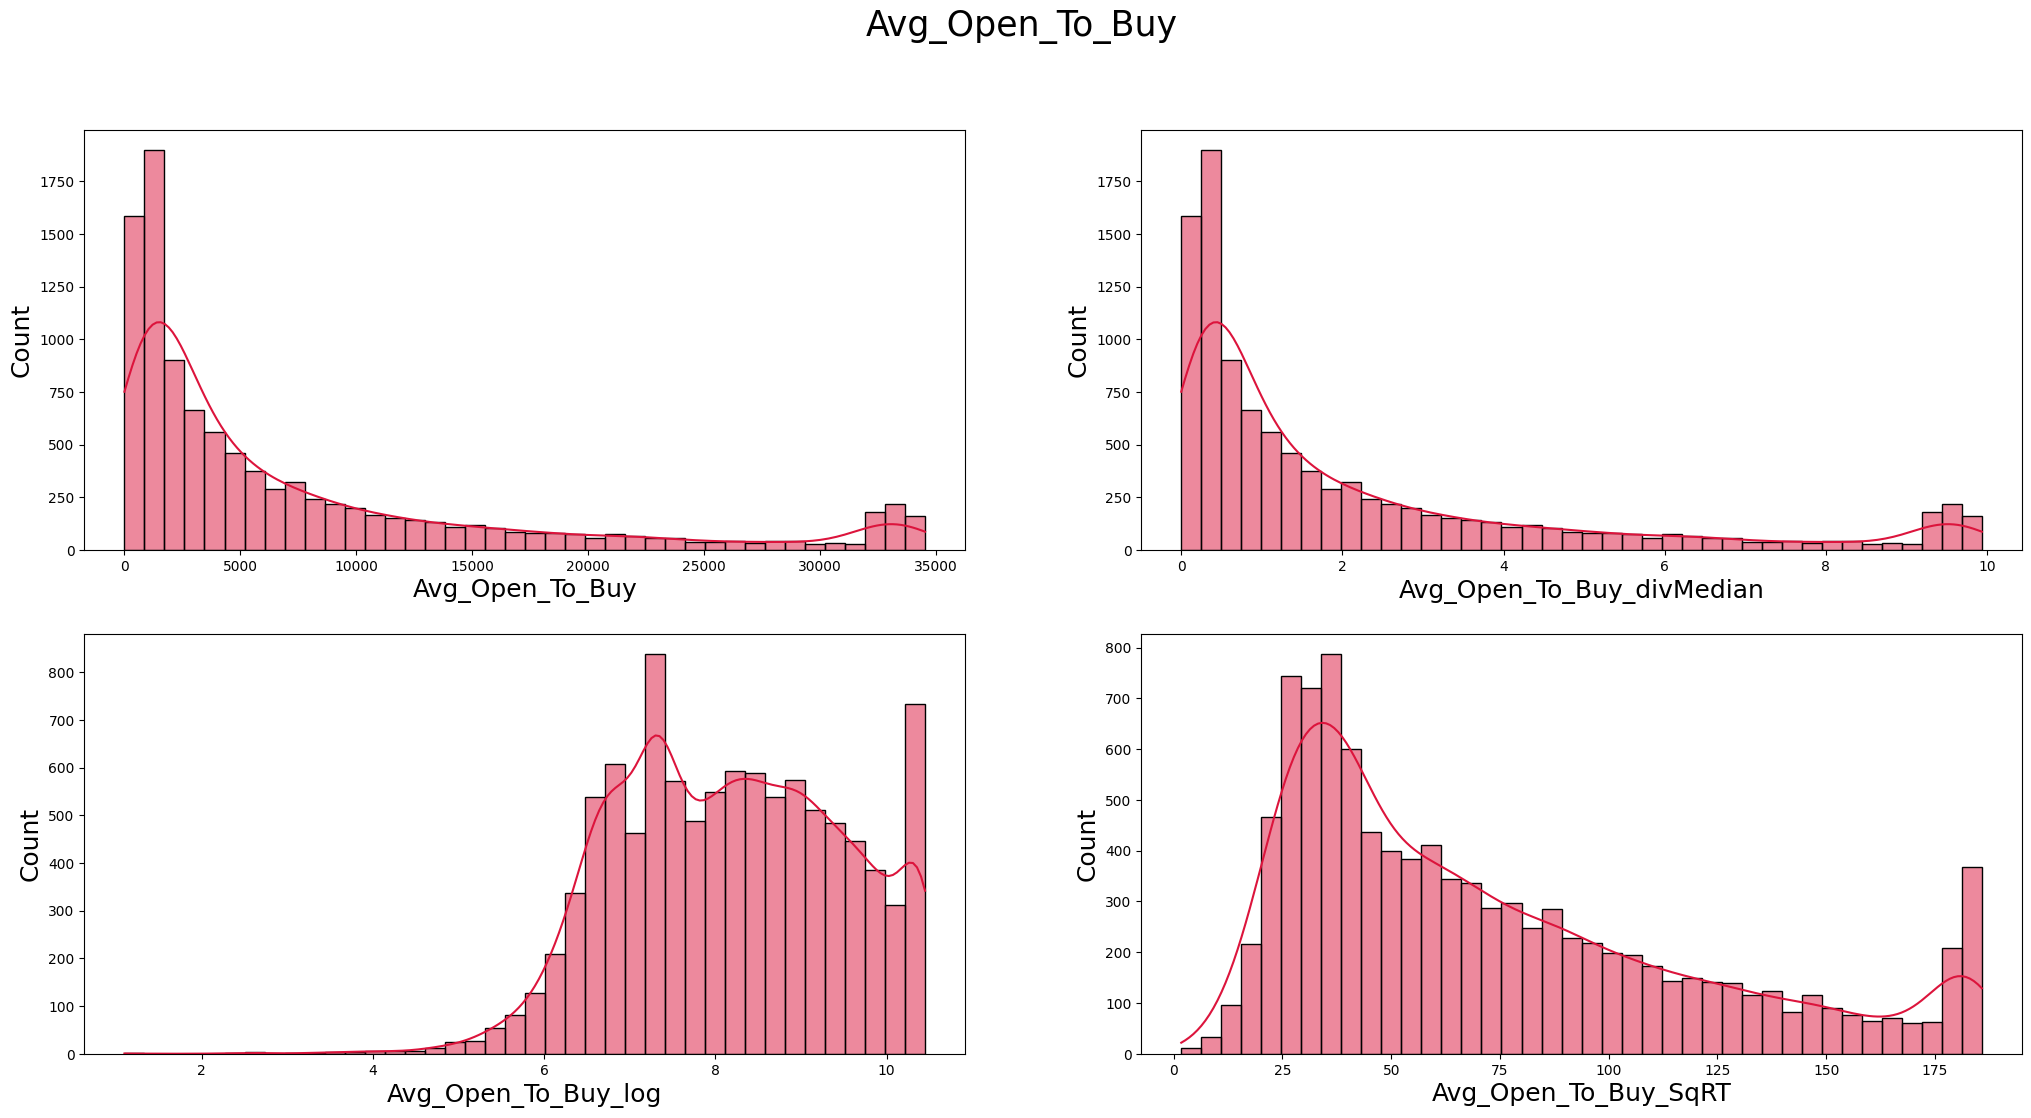

In [10]:
#Avg_Open_To_Buy - Distribution Camparison with div Median and log Scaling
#Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use 
list_col =  ['Avg_Open_To_Buy', 'Avg_Open_To_Buy_divMedian','Avg_Open_To_Buy_log','Avg_Open_To_Buy_SqRT']
Distribution_Comparison(list_col,2)

<Figure size 640x480 with 0 Axes>

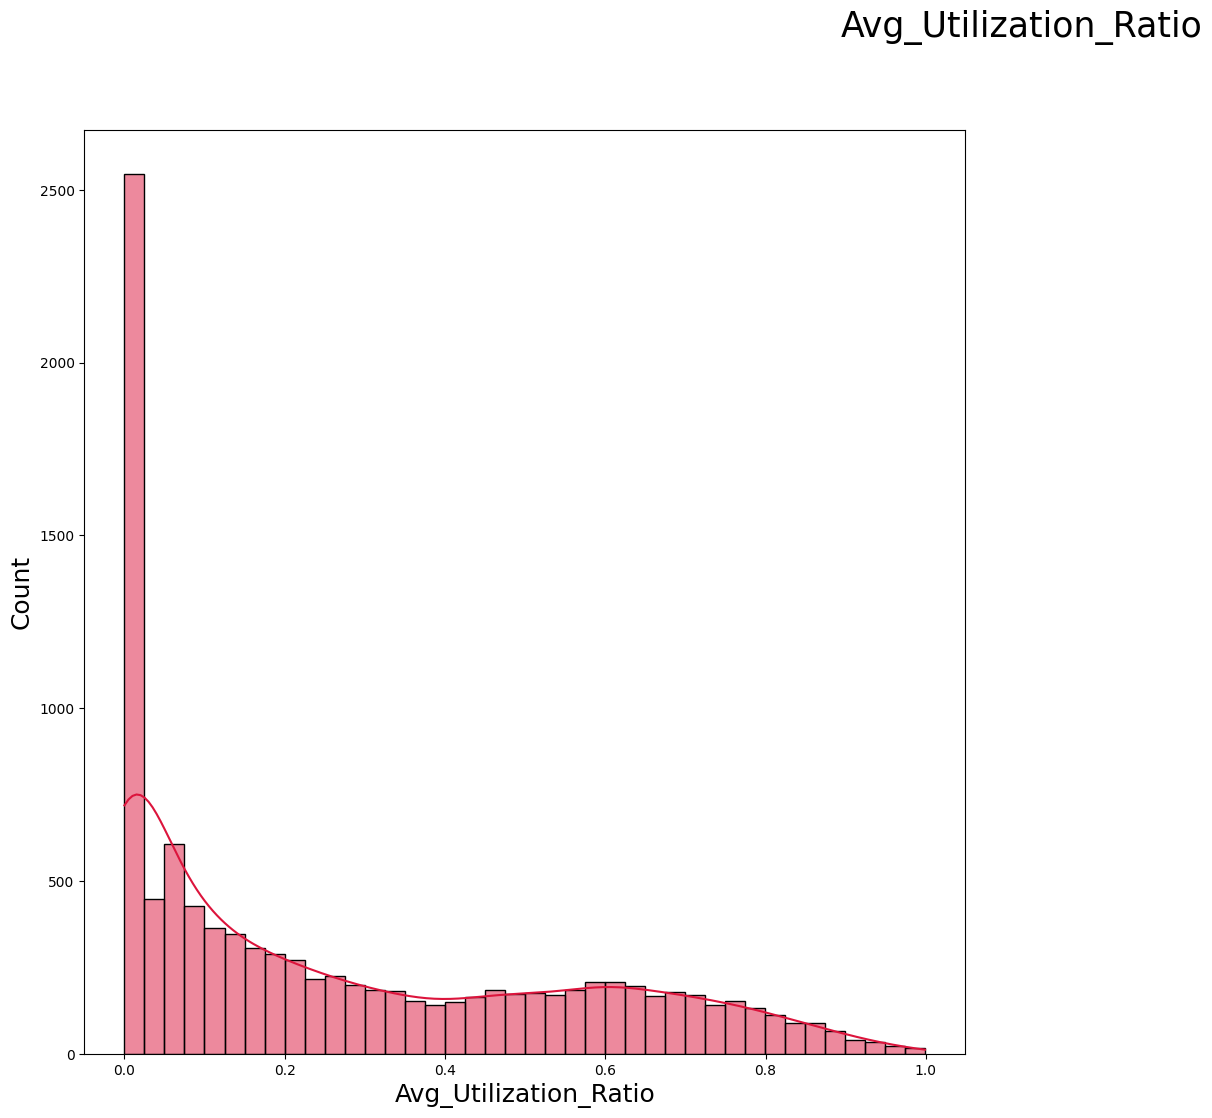

In [11]:
#Avg_Utilization_Ratio: Distribution Camparison with div Median Scaling
#Avg_Utilization_Ratio: Represents how much of the available credit the customer spent
list_col =  ['Avg_Utilization_Ratio']
Distribution_Comparison(list_col,2)

<Figure size 640x480 with 0 Axes>

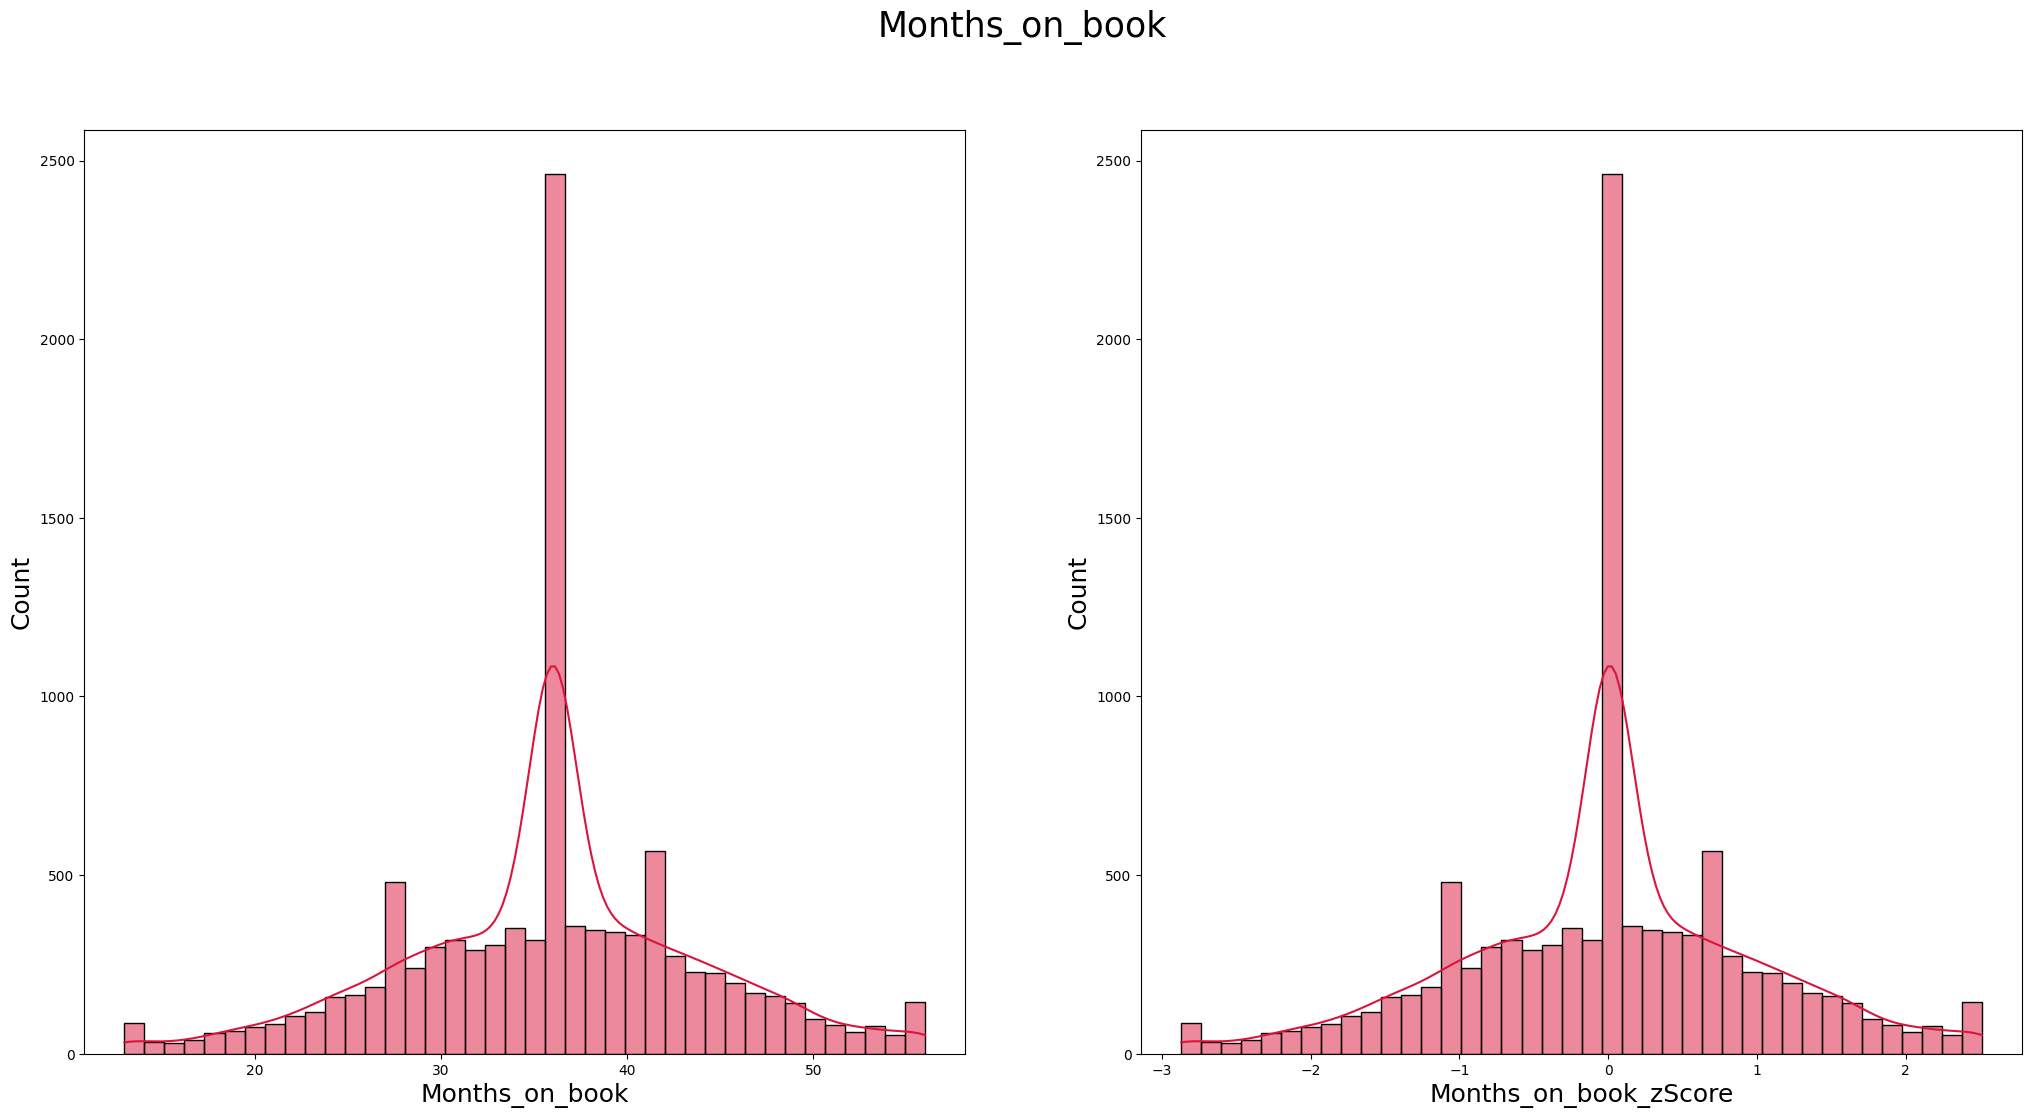

In [12]:
#Months_on_book: Distribution Camparison with zScore Scaling
#Months_on_book: Time frame with the Bank
list_col =  ['Months_on_book', 'Months_on_book_zScore']
Distribution_Comparison(list_col,2)

<Figure size 640x480 with 0 Axes>

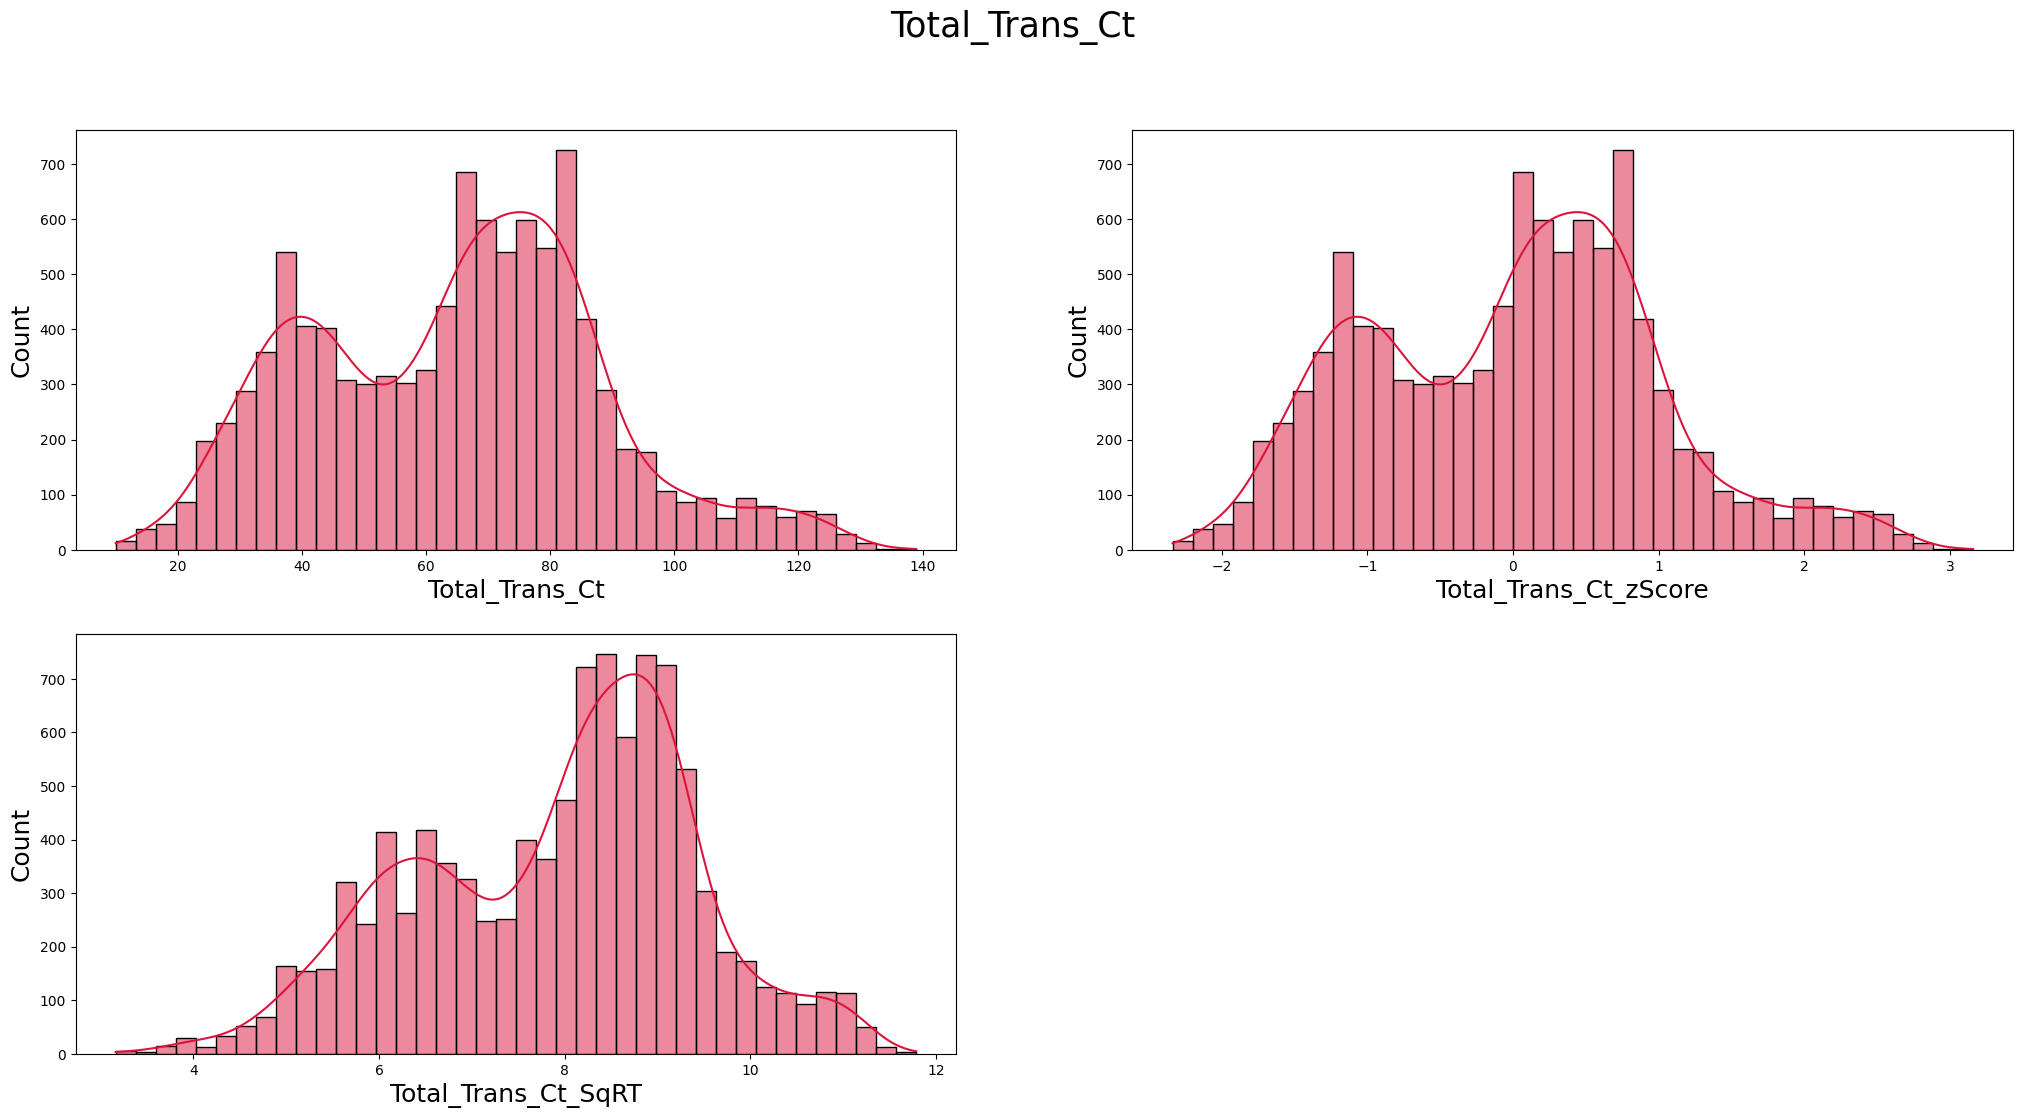

In [13]:
#Total_Trans_Ct: Distribution Camparison with zScore  and square root Scaling
#Total_Trans_Ct: Total Transaction Count in Last 12 months((one year))
list_col =  ['Total_Trans_Ct', 'Total_Trans_Ct_zScore','Total_Trans_Ct_SqRT']
Distribution_Comparison(list_col,2)

<Figure size 640x480 with 0 Axes>

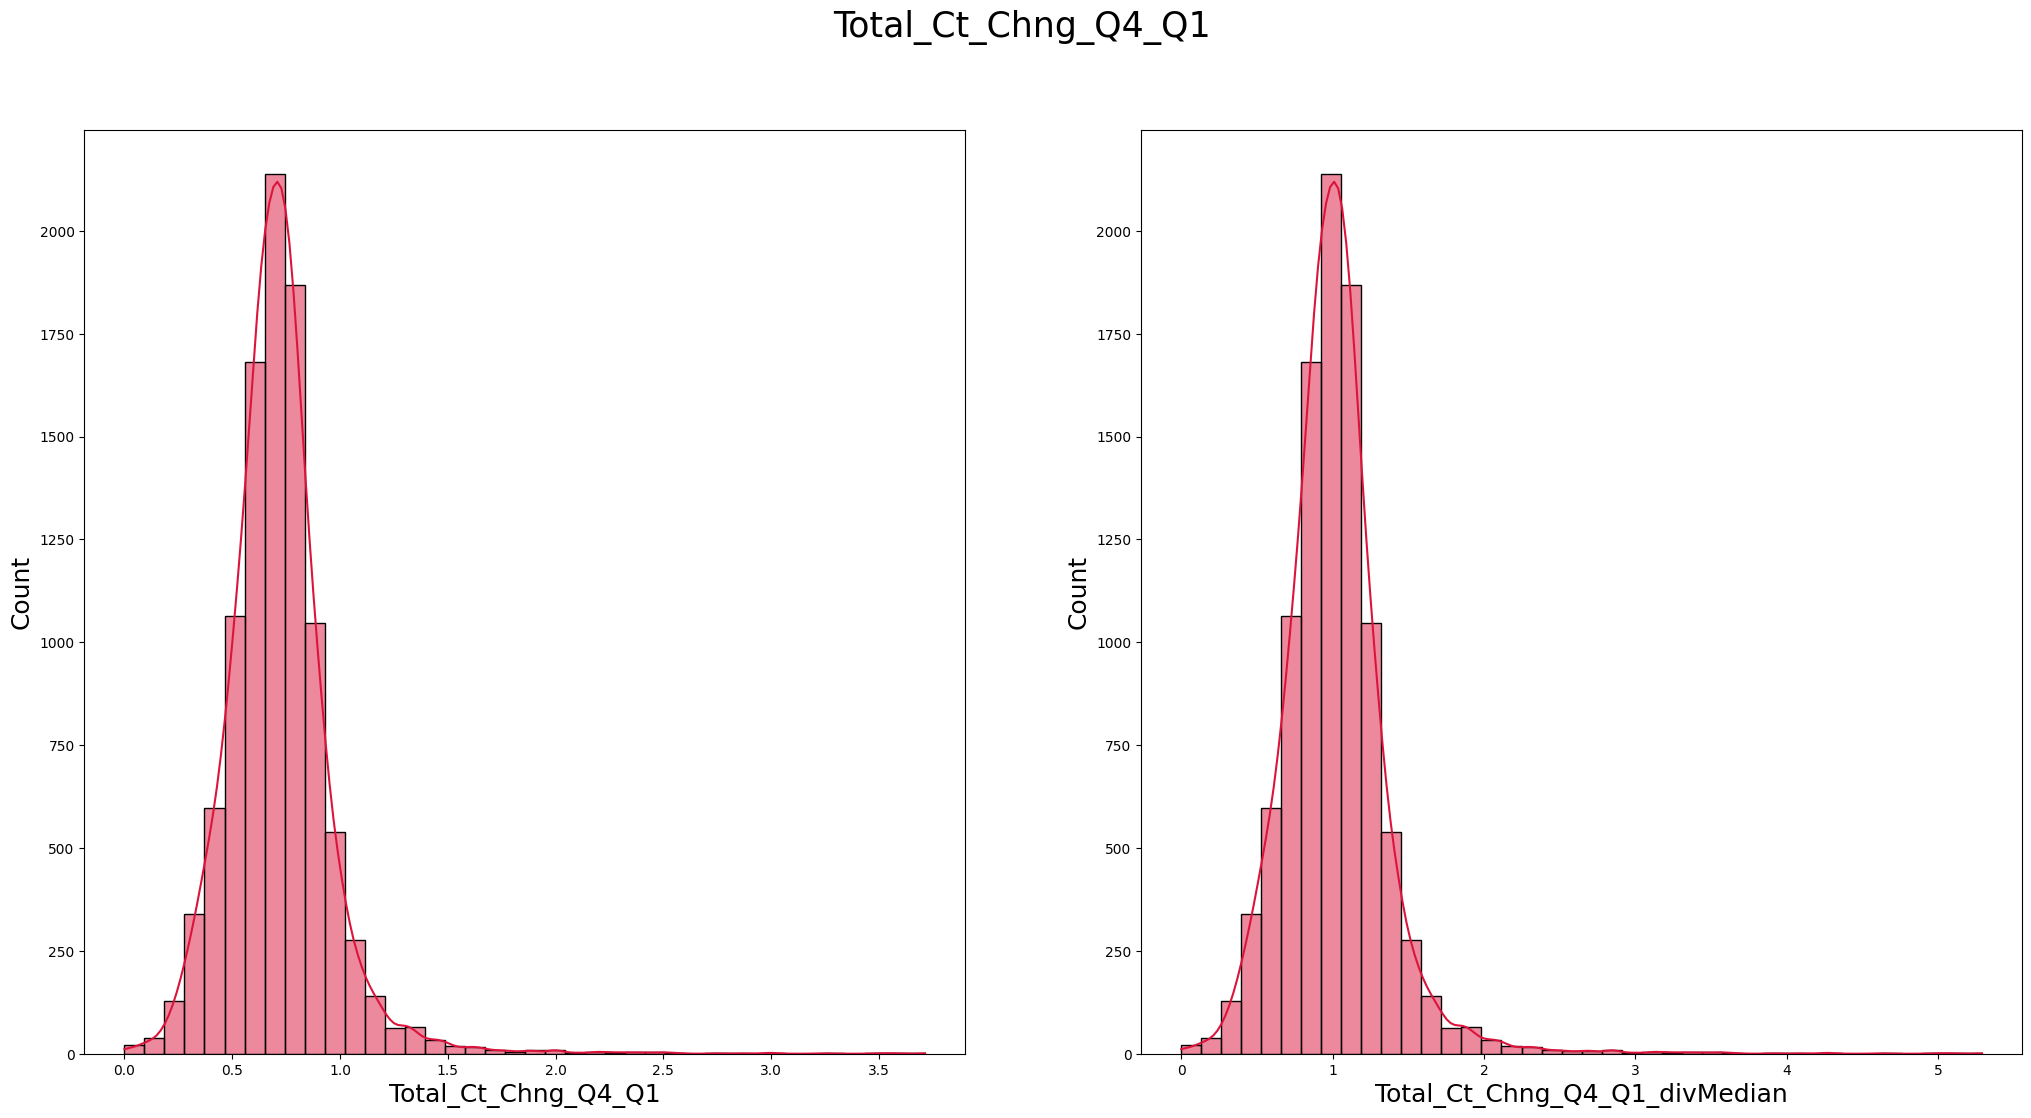

In [14]:
#Total_Ct_Chng_Q4_Q1: Distribution Camparison with div Median Scaling
#Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
list_col =  ['Total_Ct_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1_divMedian']
Distribution_Comparison(list_col,2)

Checking the features are Gaussian or Normaly Distributed using Q-Q plot


In [15]:
import scipy.stats as stat
import scipy.stats as skew
import pylab
fig = plt.figure(1)

def plot_feature(col):
    fig = plt.figure(figsize=(12,5))
    fig.suptitle(col, fontsize=18)
    plt.subplot(1,2,1)
    plt.xlabel(col, fontsize = 12)
    sns.histplot(x=ccattr_data[col], kde=True, bins = 40,color="navy")
    plt.subplot(1,2,2)
    stat.probplot(ccattr_data[col],dist ="norm",plot=pylab)
    plt.show()

<Figure size 640x480 with 0 Axes>

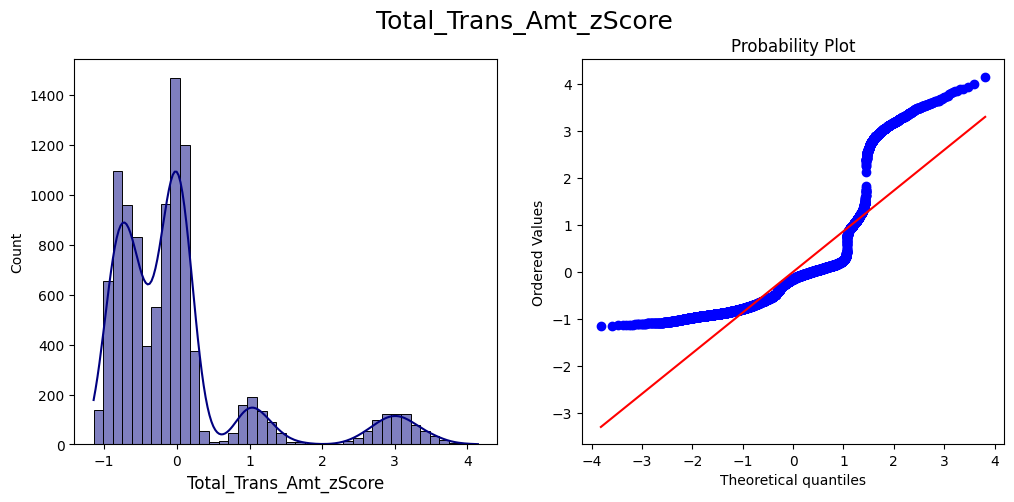


Skewness for data :  2.040701078977832


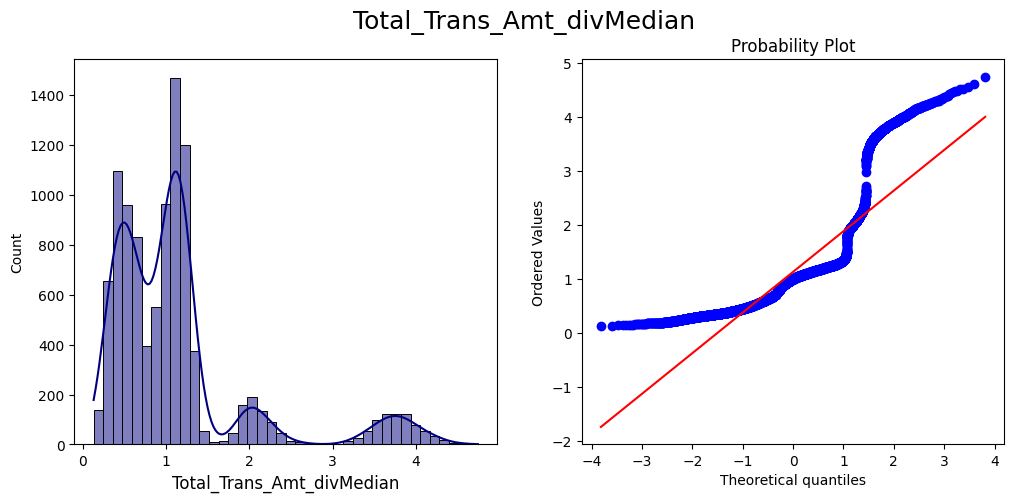


Skewness for data :  2.040701078977832


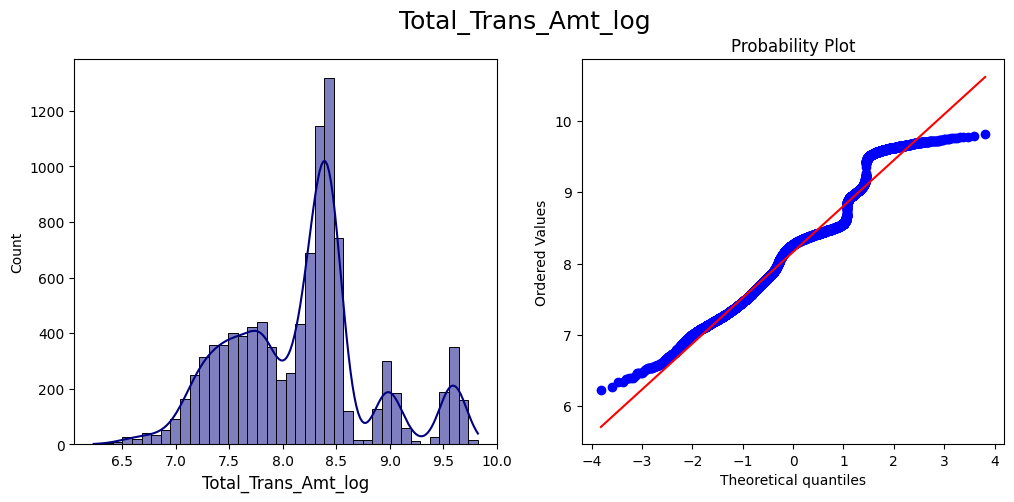


Skewness for data :  0.26217162185825943


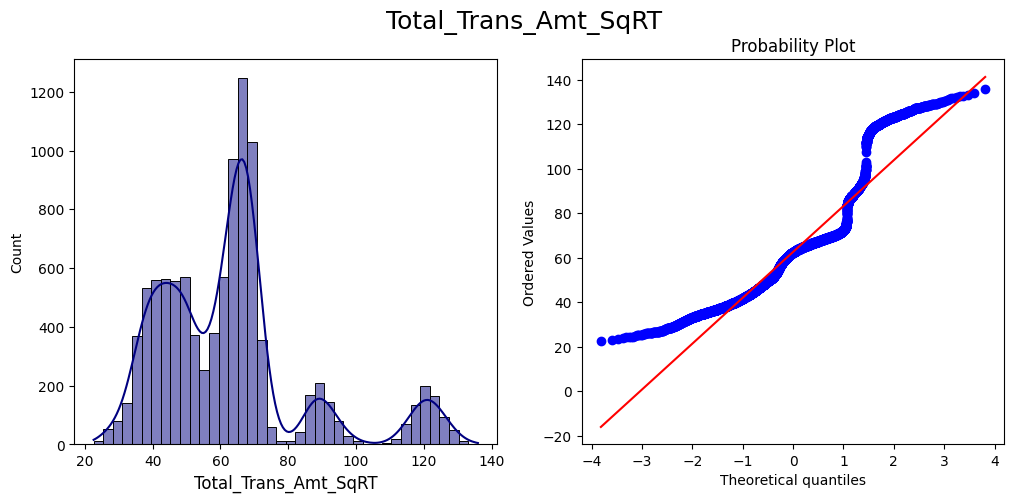


Skewness for data :  1.2159538745497598


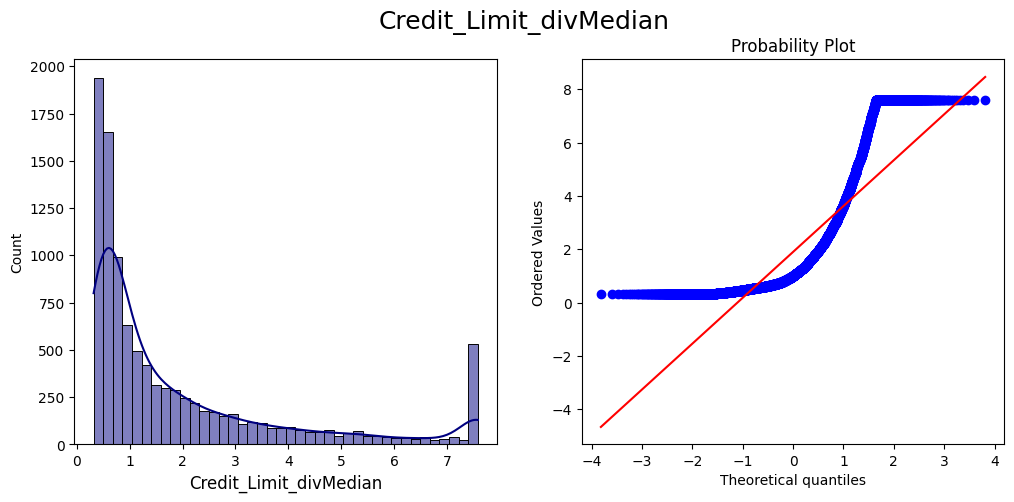


Skewness for data :  1.6664789242587696


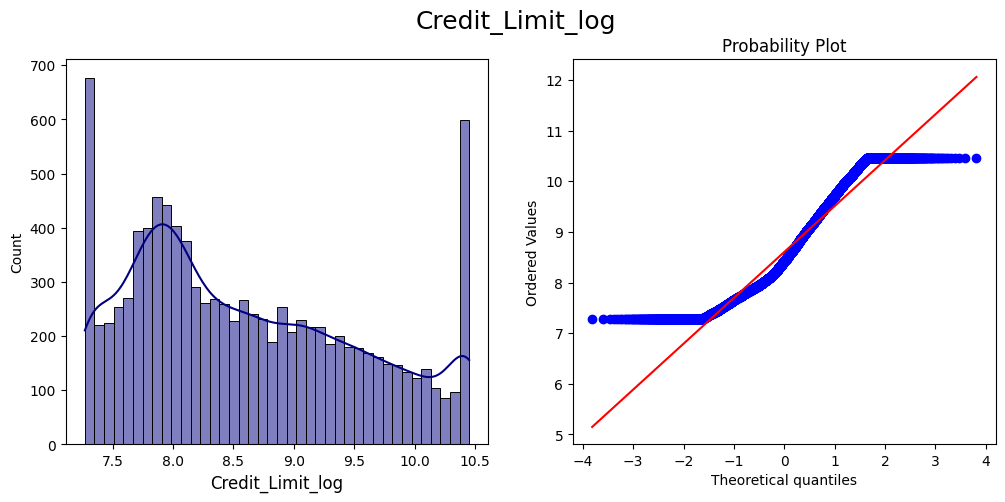


Skewness for data :  0.45701298484491415


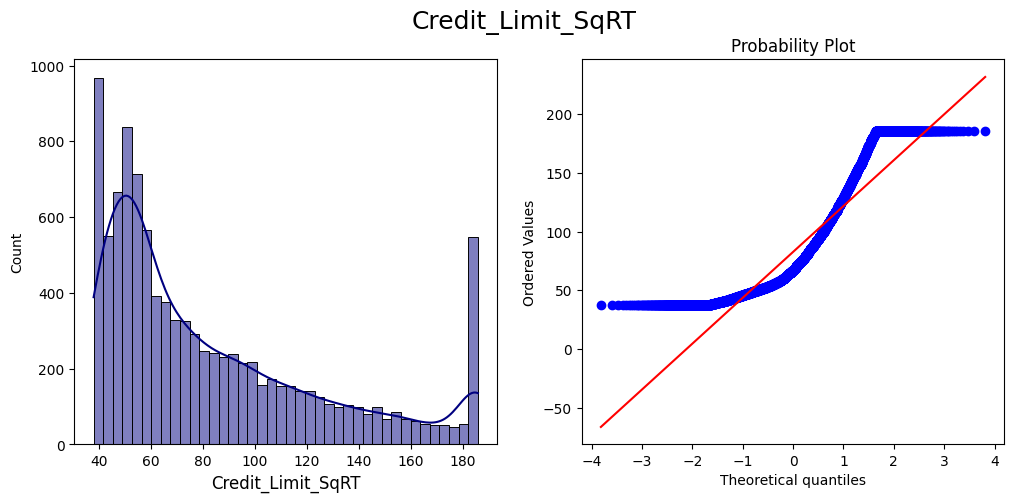


Skewness for data :  1.0878279468292171


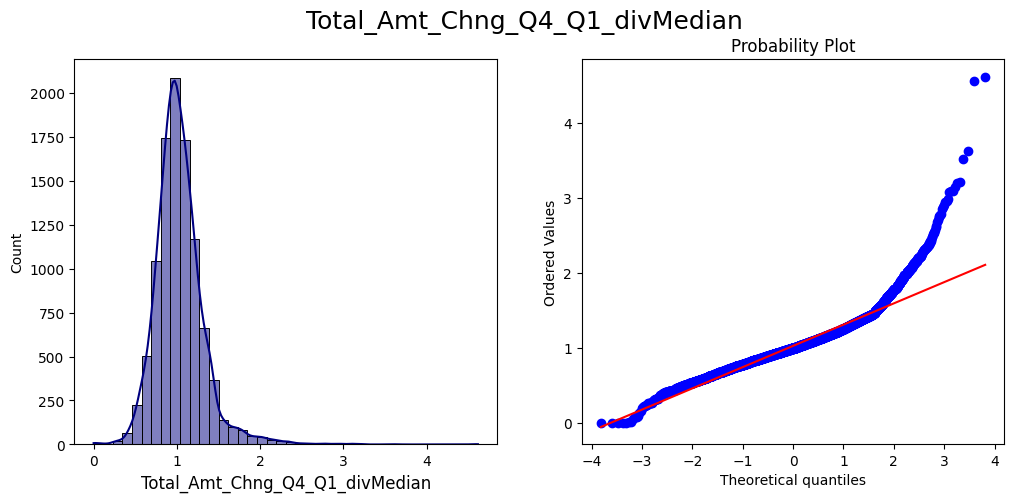


Skewness for data :  1.7318068495622174


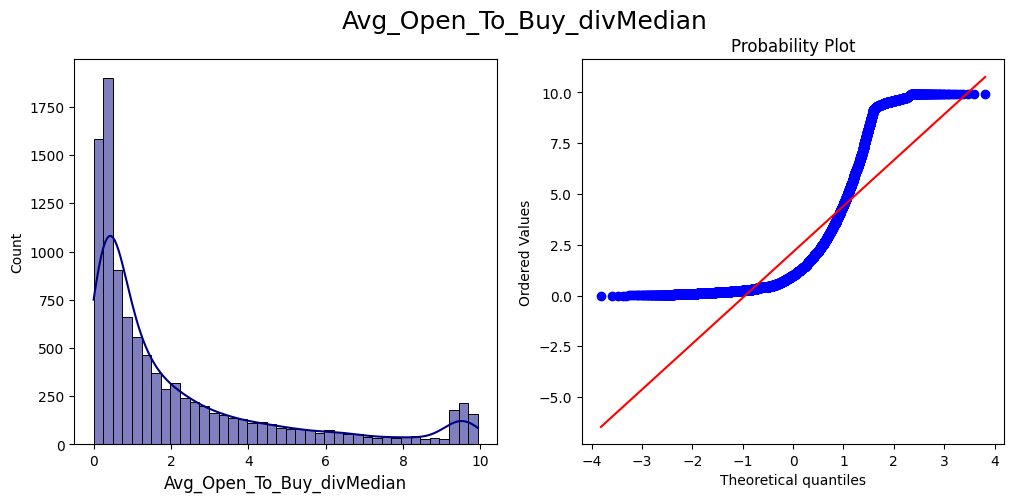


Skewness for data :  1.6614504071556484


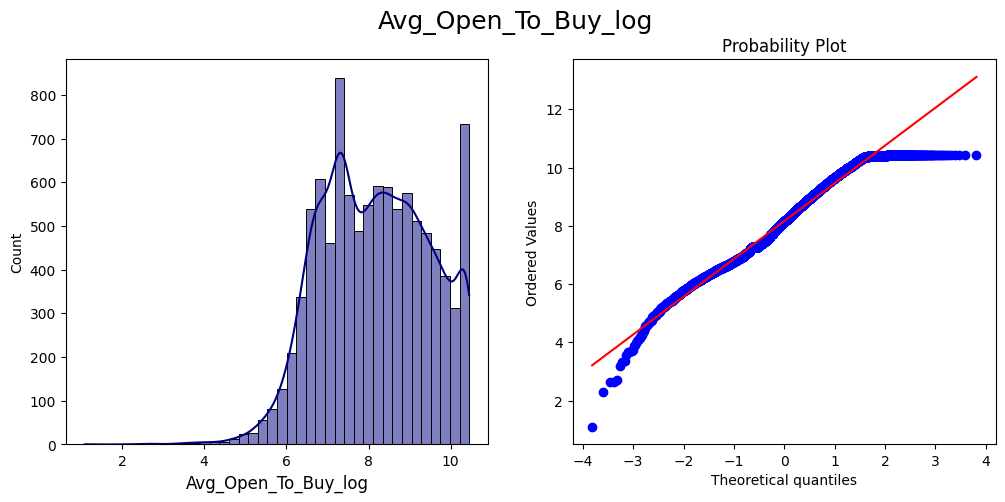


Skewness for data :  -0.10011669515996642


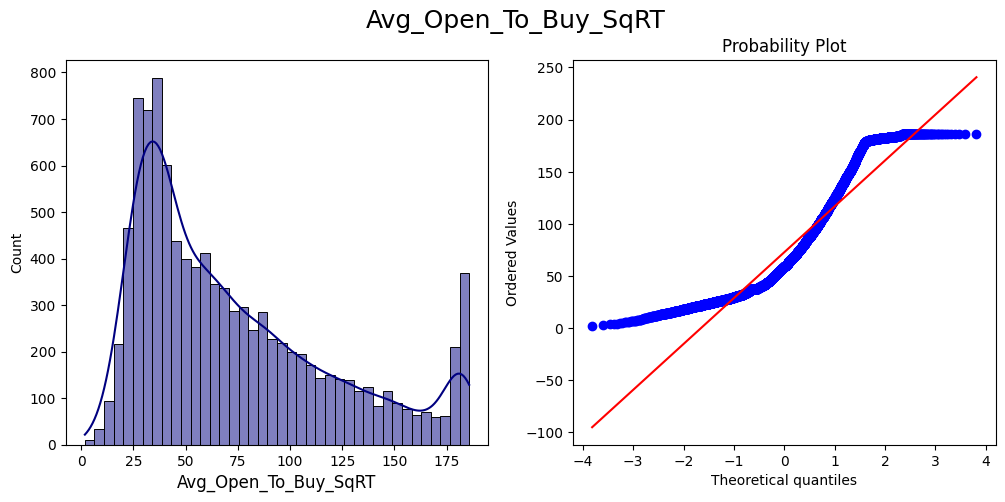


Skewness for data :  0.9404303520228733


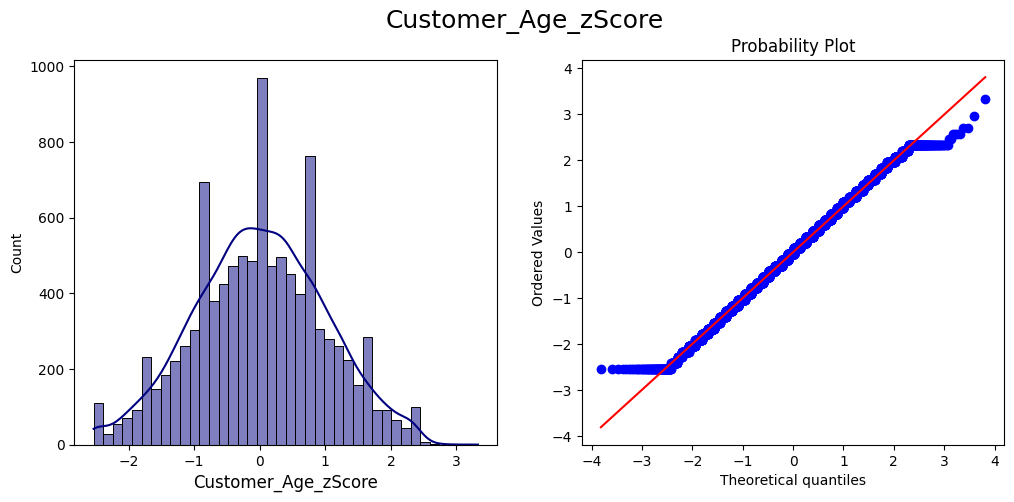


Skewness for data :  -0.03360003857464476


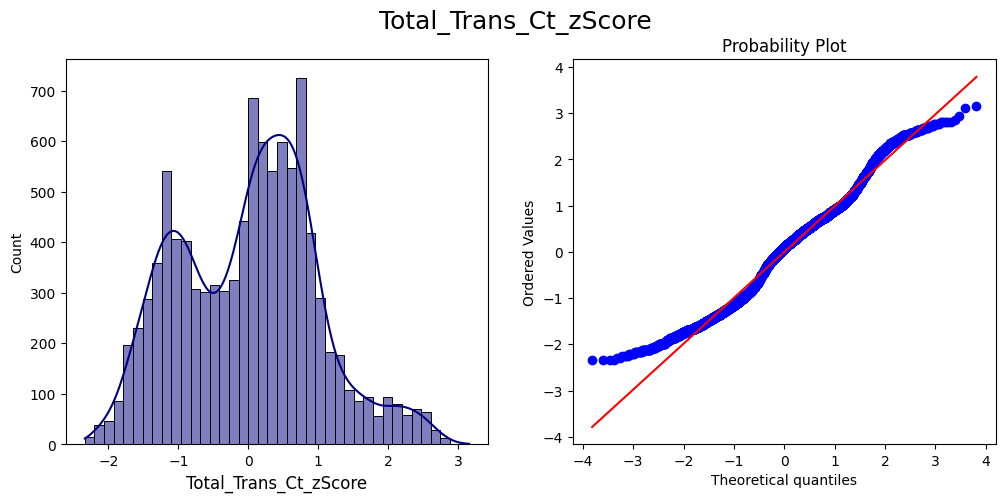


Skewness for data :  0.15365030567779722


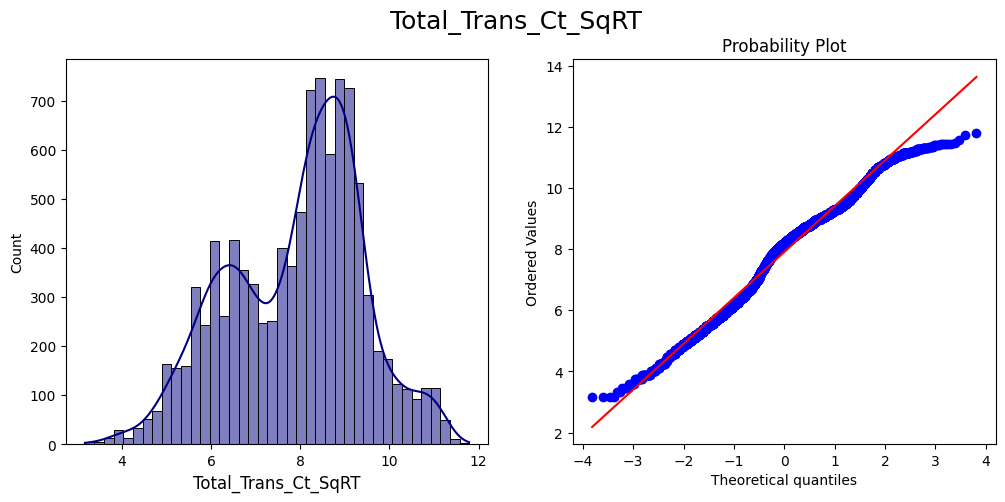


Skewness for data :  -0.2875786527422119


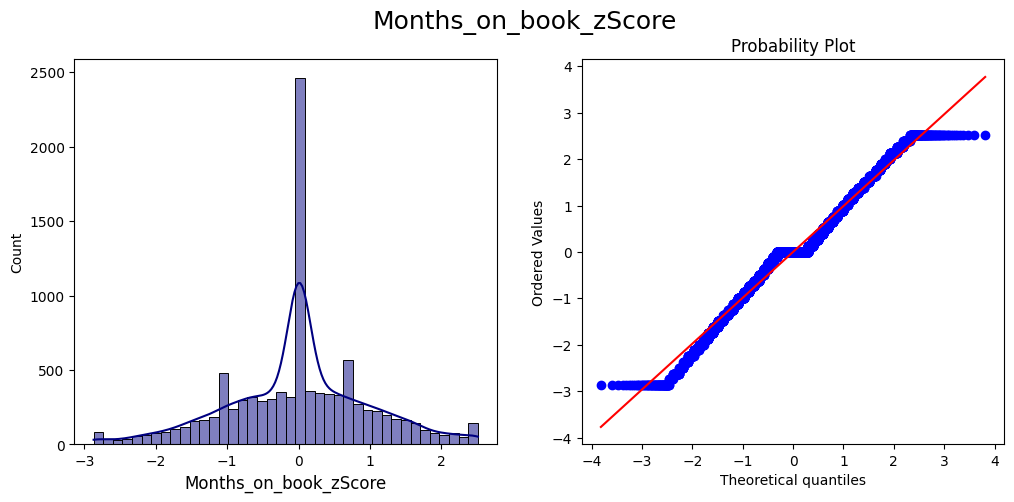


Skewness for data :  -0.10654957490172048


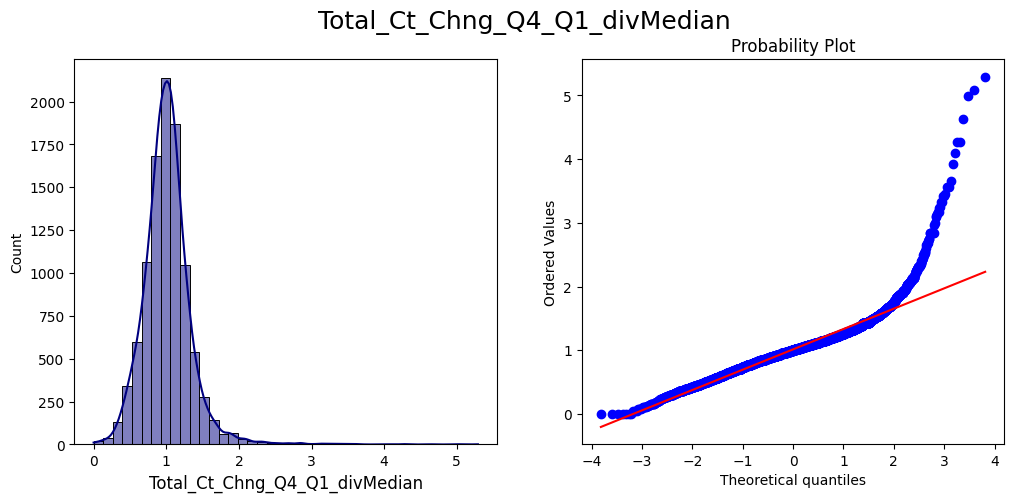


Skewness for data :  2.063724833411373


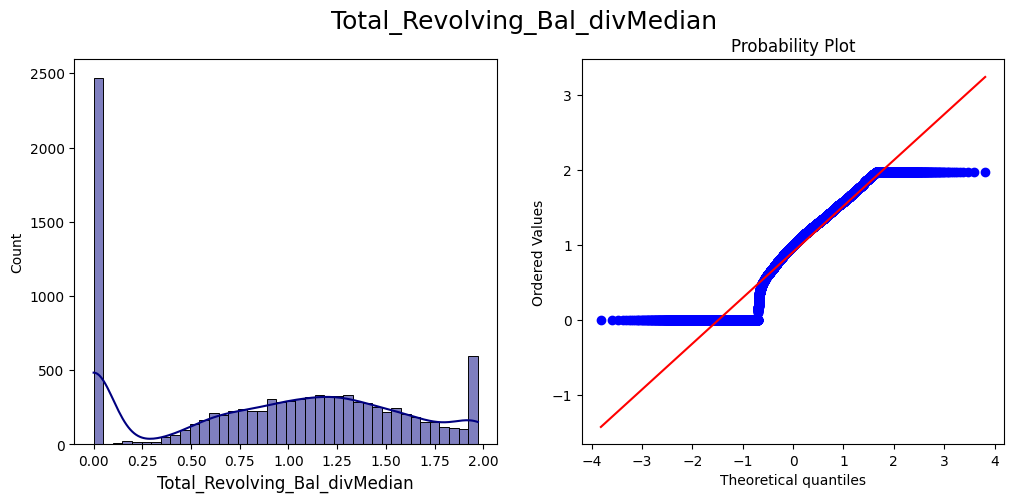


Skewness for data :  -0.14881520376464547


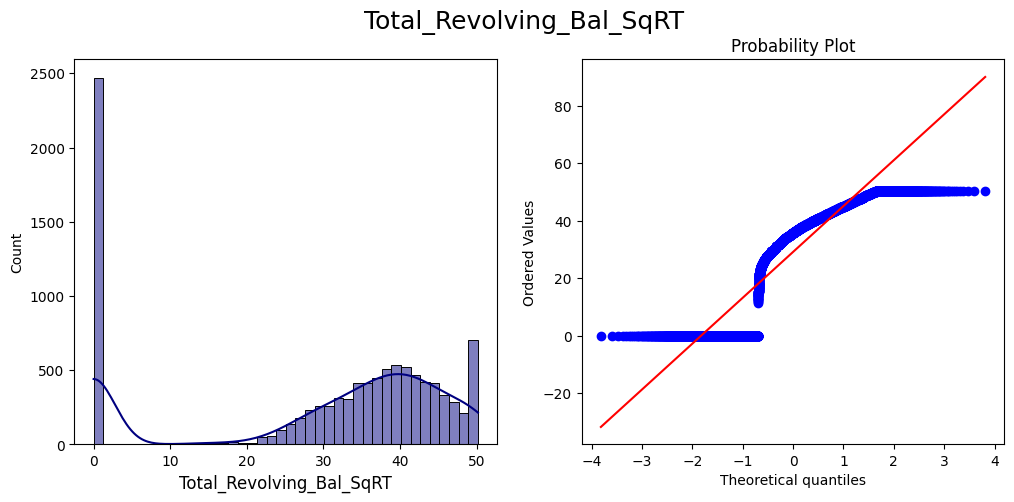


Skewness for data :  -0.7832063996532439


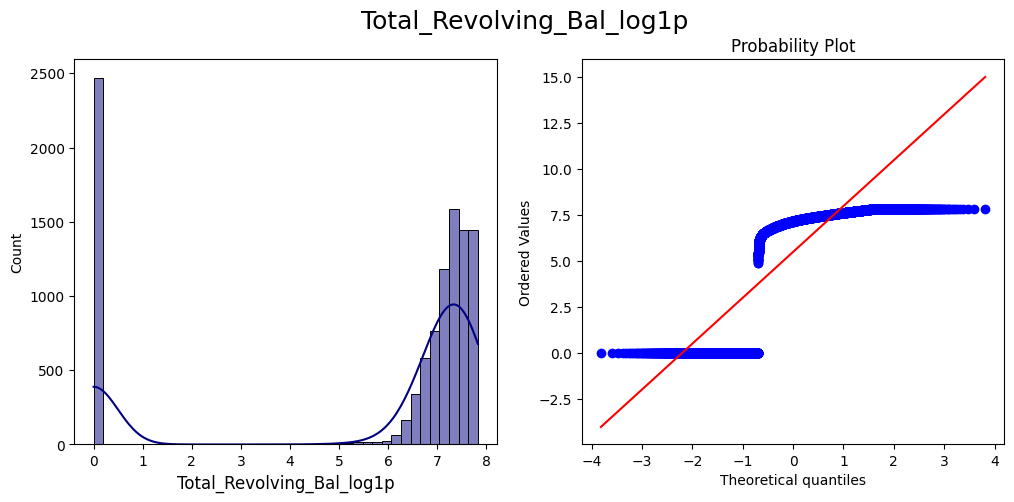


Skewness for data :  -1.1481363682488654


In [16]:
from scipy.stats import skew
listing_feature =[
       'Total_Trans_Amt_zScore','Total_Trans_Amt_divMedian','Total_Trans_Amt_log','Total_Trans_Amt_SqRT',
        'Credit_Limit_divMedian','Credit_Limit_log','Credit_Limit_SqRT',
        'Total_Amt_Chng_Q4_Q1_divMedian',
        'Avg_Open_To_Buy_divMedian','Avg_Open_To_Buy_log','Avg_Open_To_Buy_SqRT',
        'Customer_Age_zScore',
        'Total_Trans_Ct_zScore', 'Total_Trans_Ct_SqRT',
        'Months_on_book_zScore',
        'Total_Ct_Chng_Q4_Q1_divMedian', 
        'Total_Revolving_Bal_divMedian','Total_Revolving_Bal_SqRT','Total_Revolving_Bal_log1p']
for i in listing_feature:
    plot_feature(i)
    print('\nSkewness for data : ', skew(ccattr_data[i]))


Plots that shows straight line and hence we can say it is Gaussian Distributed are -
* Total_Trans_Amt_log
* Credit_Limit_log
* Avg_Open_To_Buy_log
* Customer_Age_zScore
* Total_Trans_Ct_zScore
* Months_on_book_zScore

Total_Trans_Ct_zScore,Total_Trans_Ct_SqR - these two appears to be similar

After Comparing each scaled feature with original and with the help of Q-Q plot, below scaled features are selected for further exploration.

* Customer_Age_zScore
* Credit_Limit_log or div Median
* Total_Revolving_Bal_divMedian
* Avg_Open_To_Buy_log or div Median
* Total_Amt_Chng_Q4_Q1_divMedian
* Total_Trans_Amt_log or zScore
* Total_Trans_Ct_zScore
* Total_Ct_Chng_Q4_Q1_divMedian
* Months_on_book_zScore
* Total_Amt_Chng_Q4_Q1_divMedian


Rest of the features are kept as is. No scaling is applied And those are 
* Gender_Encoded
* Dependent_count
* Education_Level_sorted
* Marital_Status_sorted
* Income_Category_sorted
* Card_Category_sorted
* Months_on_book_zScore
* Total_Relationship_Count
* Months_Inactive_12_mon
* Contacts_Count_12_mon
* Avg_Utilization_Ratio
* naive_cls1
* naive_cls2
* CLIENTNUM


### Hist plot for discrete values

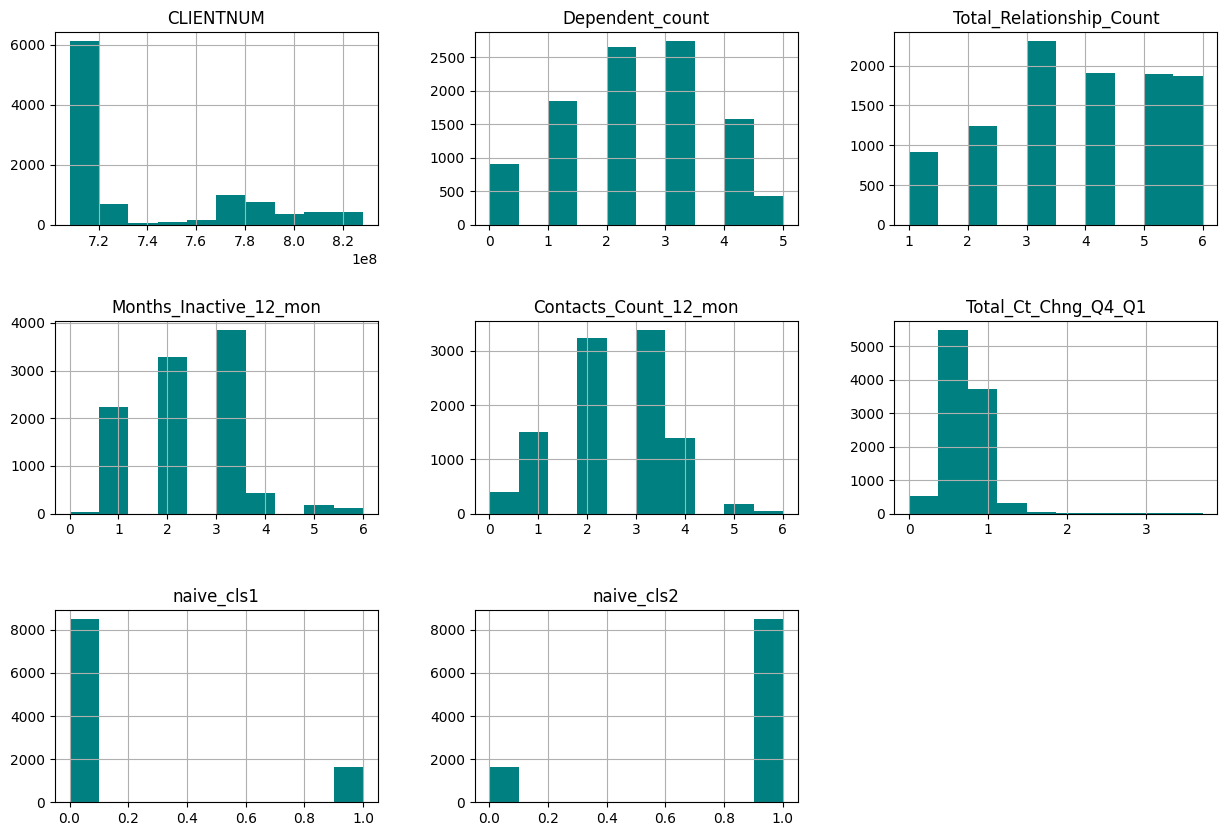

In [17]:
#"Attrition_Flag","Gender","Education_Level","Marital_Status","Income_Category","Card_Category"
list_col=  ["CLIENTNUM","Dependent_count","Total_Relationship_Count","Months_Inactive_12_mon","Contacts_Count_12_mon",
            "Total_Ct_Chng_Q4_Q1","naive_cls1","naive_cls2"]
ccattr_data[list_col].hist(figsize=(15, 10),color = "teal")
plt.subplots_adjust(hspace=0.5);

* Customer with dependednt count 3 or 4 are more
* total relationship with bank range between 3 to 6 years
* Bank ahs contacted the customer 2 to 4 times for most of the customer
* customer stayed inactive for 3 months followed with 2 months

**Features Comparison with Attrition(Target)**

C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


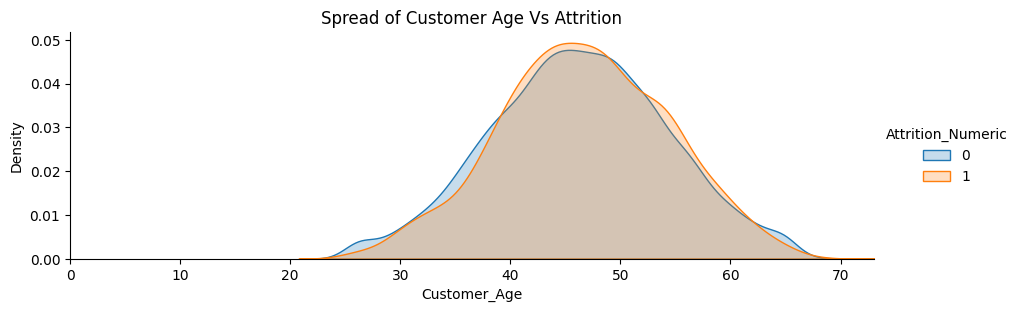

In [18]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Numeric",aspect=3)
facet.map(sns.kdeplot,"Customer_Age",shade=True)
facet.set(xlim=(0, ccattr_data["Customer_Age"].max()))
facet.set(title="Spread of Customer Age Vs Attrition")
facet.add_legend()

There is no difference in Age of attrited and existing customers. it doesnt look to have any relation with attrition. Majority of the customer gae is between 35 to 55.

C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


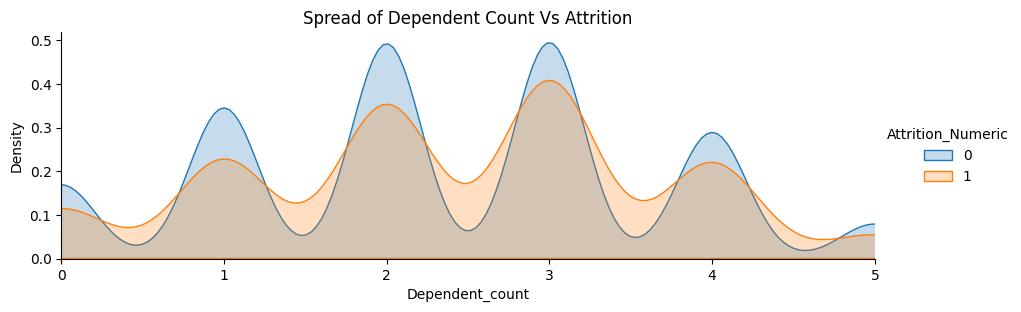

In [19]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Numeric",aspect=3)
facet.map(sns.kdeplot,"Dependent_count",shade= True)
facet.set(xlim=(0, ccattr_data["Dependent_count"].max()))
facet.set(title="Spread of Dependent Count Vs Attrition")
facet.add_legend()

Customer with 2 and 3 dependent attrited more, followed with 1 and 4.Means customer with 0 dependents or more than 5 are less probable of churning.

C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


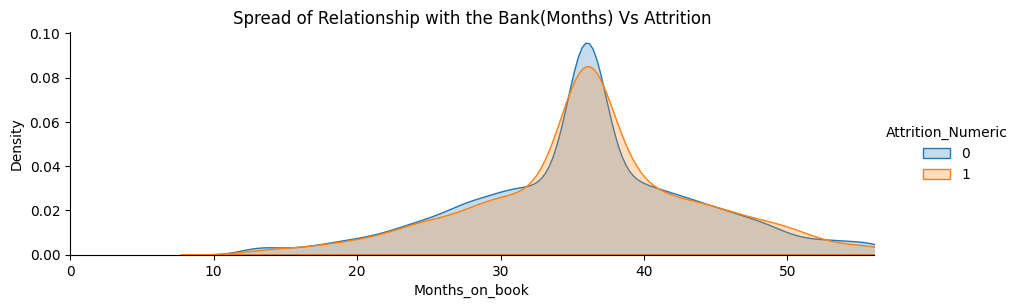

In [20]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Numeric",aspect=3)
facet.map(sns.kdeplot,"Months_on_book",shade= True)
facet.set(xlim=(0, ccattr_data["Months_on_book"].max()))
facet.set(title="Spread of Relationship with the Bank(Months) Vs Attrition")
facet.add_legend()

Average period of relationship with the bank is ~35 to ~40.

C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


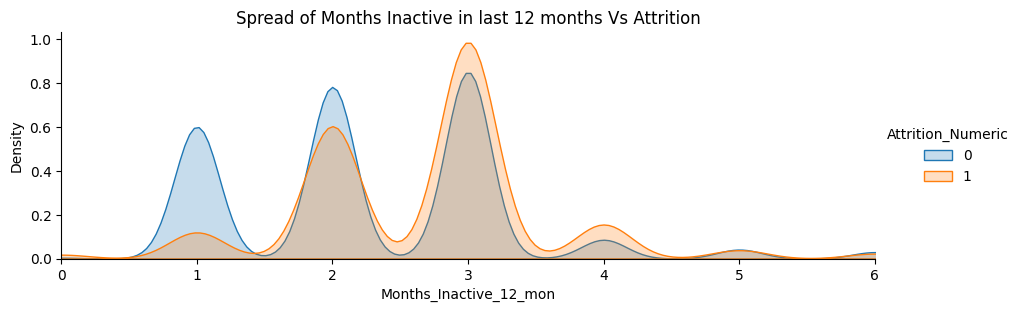

In [21]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Numeric",aspect=3)
facet.map(sns.kdeplot,"Months_Inactive_12_mon",shade= True)
facet.set(xlim=(0, ccattr_data["Months_Inactive_12_mon"].max()))
facet.set(title="Spread of Months Inactive in last 12 months Vs Attrition")
facet.add_legend()

The customer were inactive for 3 months,are more likely to be churned, followed with 2 months. Surprise is more than 4 months are very less and their attrition rate is also very low. so target customers are those who stayed inactive for 2 to 3 months.

C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


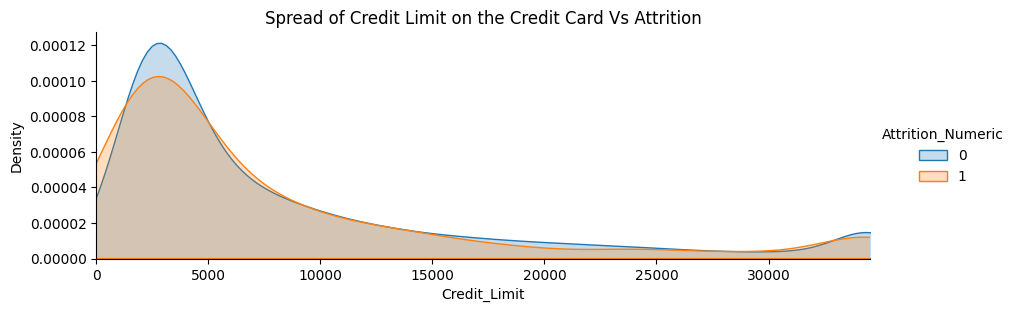

In [22]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Numeric",aspect=3)
facet.map(sns.kdeplot,"Credit_Limit",shade= True)
facet.set(xlim=(0, ccattr_data["Credit_Limit"].max()))
facet.set(title="Spread of Credit Limit on the Credit Card Vs Attrition")
facet.add_legend()

Customer with lower credit limit attried more.

C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


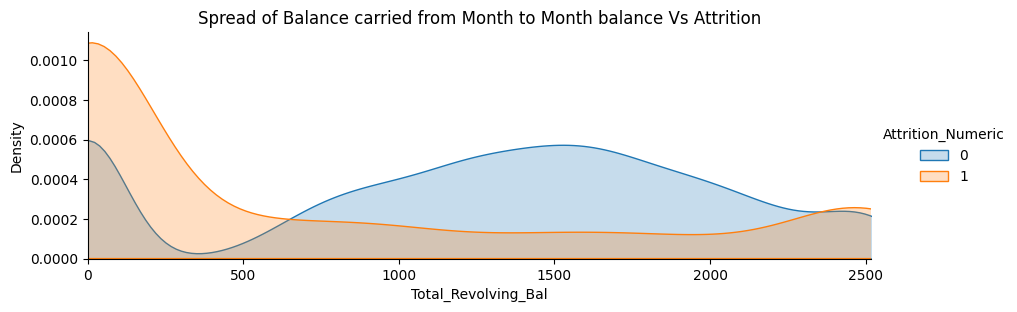

In [23]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Numeric",aspect=3)
facet.map(sns.kdeplot,"Total_Revolving_Bal",shade= True)
facet.set(xlim=(0, ccattr_data["Total_Revolving_Bal"].max()))
facet.set(title="Spread of Balance carried from Month to Month balance Vs Attrition")
facet.add_legend()

There appears to be strange behaviour of customer. Customer with relvoving balance more than 500 attrited more.And attrition rate peaks betweem balance beyween 1000 to 2000.

C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


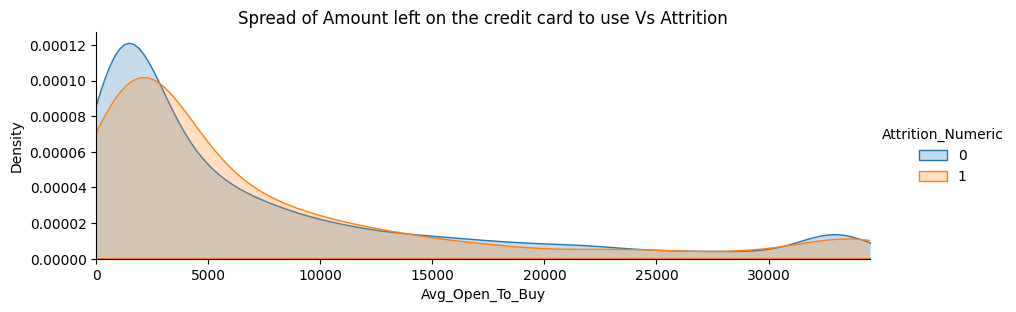

In [24]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Numeric",aspect=3)
facet.map(sns.kdeplot,"Avg_Open_To_Buy",shade= True)
facet.set(xlim=(0, ccattr_data["Avg_Open_To_Buy"].max()))
facet.set(title="Spread of Amount left on the credit card to use Vs Attrition")
facet.add_legend()

There are more customer with less amount, and potentially attrtied.

C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


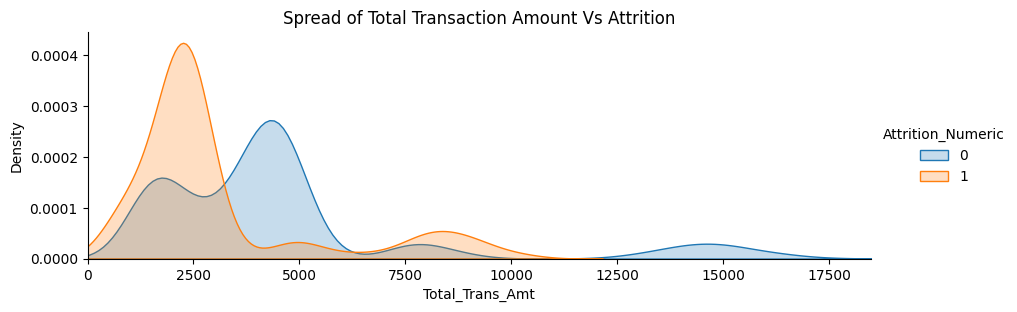

In [25]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Numeric",aspect=3)
facet.map(sns.kdeplot,"Total_Trans_Amt",shade= True)
facet.set(xlim=(0, ccattr_data["Total_Trans_Amt"].max()))
facet.set(title="Spread of Total Transaction Amount Vs Attrition")
facet.add_legend()

Customer with Transaction amount under 5000 are attried more.Customers with lesser transaction amount spend and low change in transaction_spend_Q1_Q4 were more likely to attrite. 

C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\anime\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


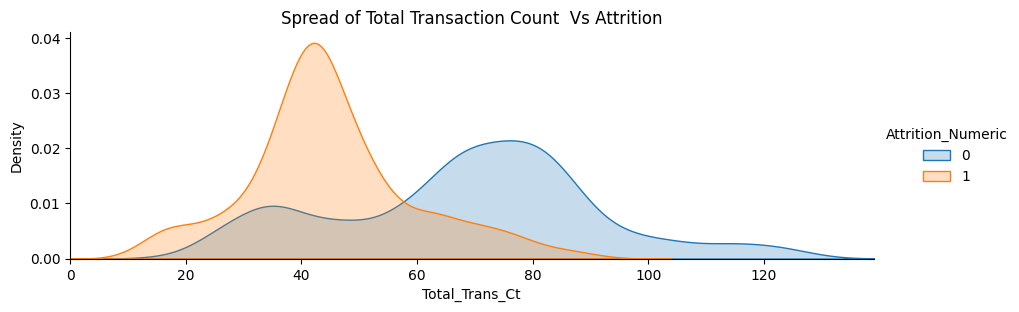

In [26]:
facet = sns.FacetGrid(ccattr_data, hue="Attrition_Numeric",aspect=3)
facet.map(sns.kdeplot,"Total_Trans_Ct",shade= True)
facet.set(xlim=(0, ccattr_data["Total_Trans_Ct"].max()))
facet.set(title="Spread of Total Transaction Count  Vs Attrition")
facet.add_legend()

Customer with transaction count between ~60 to ~90 attried more.The customers with low number of transactions and low change in number of transactions between Q1 and Q4 attrited.

**Distribution and Outliers detection for non-income related columns**

* Customer_Age
* Dependent_count
* Months_on_book - Time frame with the bank
* Total_Relationship_Count-Total no. of products held by the customer
* Months_Inactive_12_mon - No. of months inactive in the last 12 months(one year)
* Contacts_Count_12_mon - No. of Contacts between the customer and bank in the last 12 months(one year)
* Avg_Utilization_Ratio - Represents how much of the available credit the customer spent



In [27]:
## plot stacked bar chart against 
def stacked_plot(x):
    
    crosstab = pd.crosstab(x,ccattr_data['Attrition_Flag'],margins=True)
    display(crosstab)
    sns.set_theme(style="whitegrid")
    sns.set_palette(sns.color_palette("vlag_r"))
    barplot = pd.crosstab(x,ccattr_data['Attrition_Flag'],normalize='index')
    barplot.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left",title=" ",bbox_to_anchor=(1,1))
    plt.xticks(rotation=360)
    sns.despine(top=True,right=True,left=True) 
    plt.show()

Attrition_Flag,Attrited Customer,Existing Customer,All
Attrition_Flag,,,
Attrited Customer,1627,0,1627
Existing Customer,0,8500,8500
All,1627,8500,10127


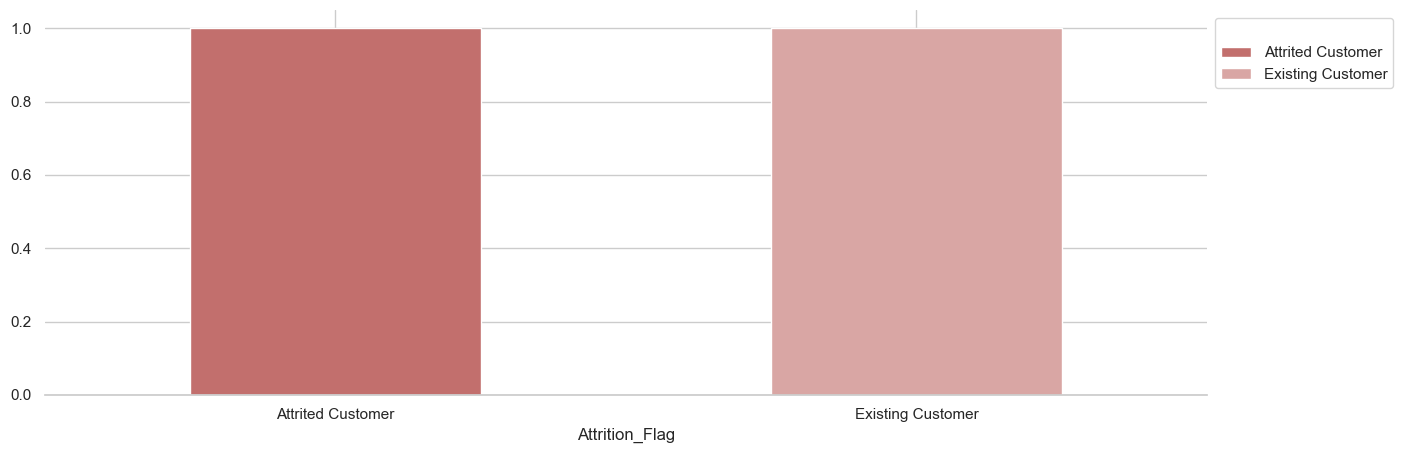

Attrition_Flag,Attrited Customer,Existing Customer,All
Gender_Encoded,,,
0,697,4072,4769
1,930,4428,5358
All,1627,8500,10127


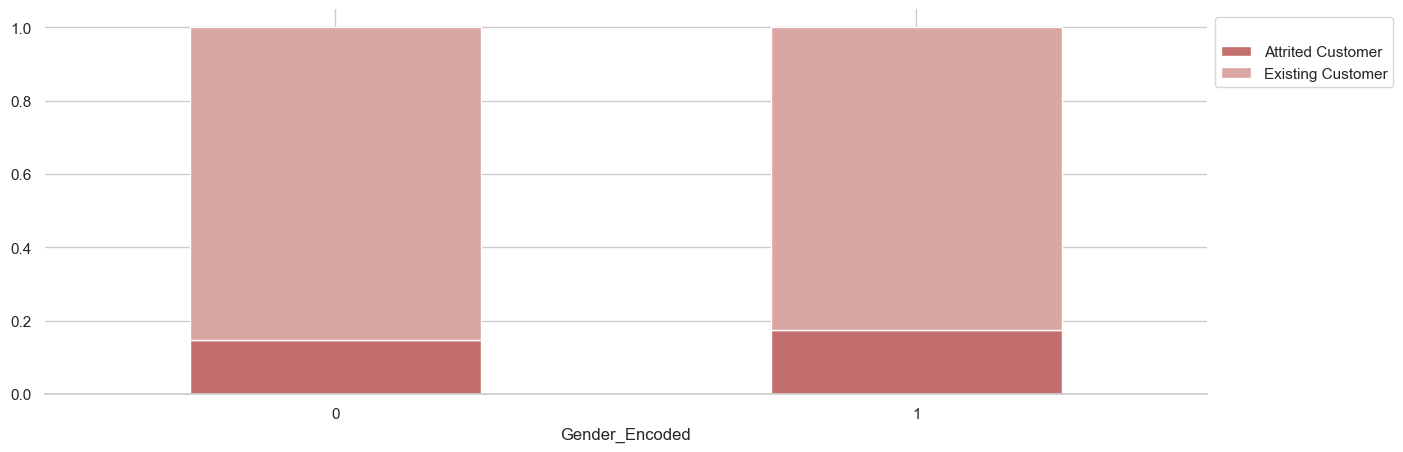

Attrition_Flag,Attrited Customer,Existing Customer,All
Education_Level_sorted,,,
College,154,859,1013
Doctorate,95,356,451
Graduate,743,3904,4647
High School,306,1707,2013
Post-Graduate,92,424,516
Uneducated,237,1250,1487
All,1627,8500,10127


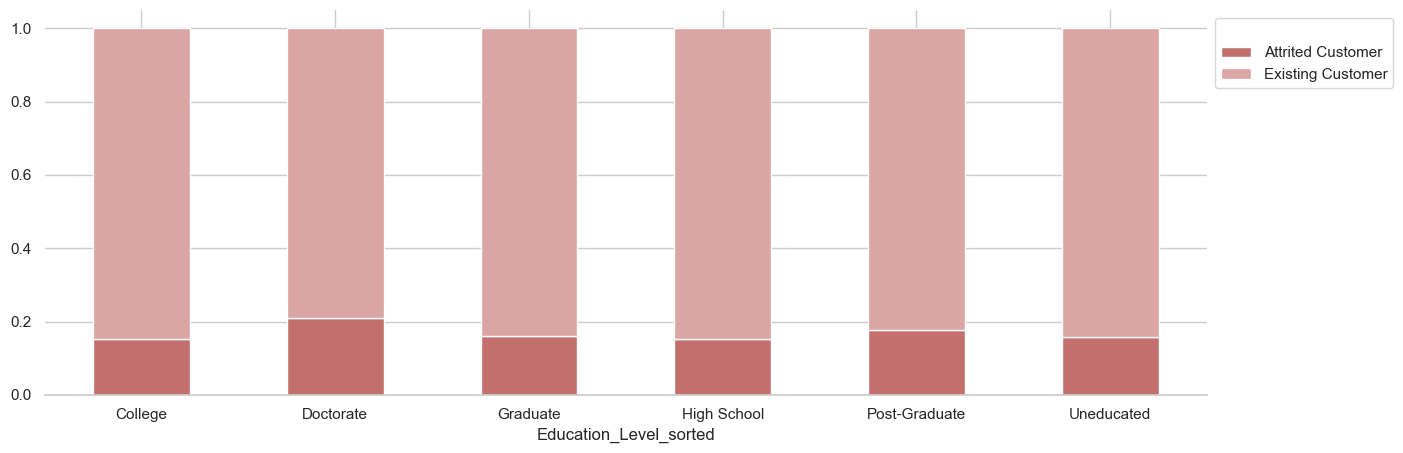

Attrition_Flag,Attrited Customer,Existing Customer,All
Marital_Status_sorted,,,
Divorced,121,627,748
Married,838,4598,5436
Single,668,3275,3943
All,1627,8500,10127


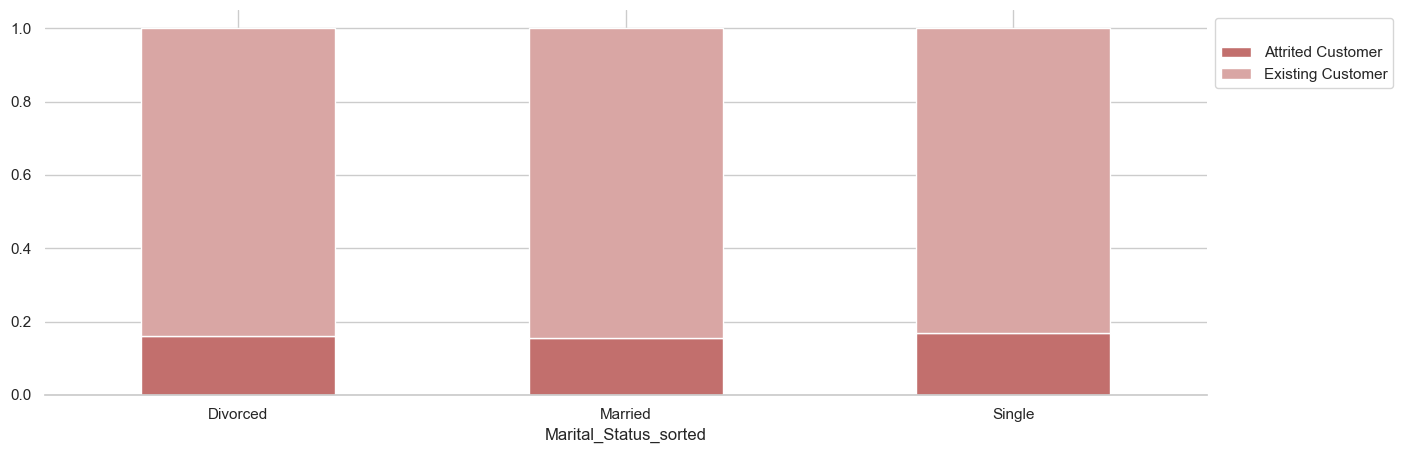

Attrition_Flag,Attrited Customer,Existing Customer,All
Income_Category_sorted,,,
0K - 40K,799,3874,4673
120K +,126,601,727
40k − 60K,271,1519,1790
60K - 80K,189,1213,1402
80K - 120K,242,1293,1535
All,1627,8500,10127


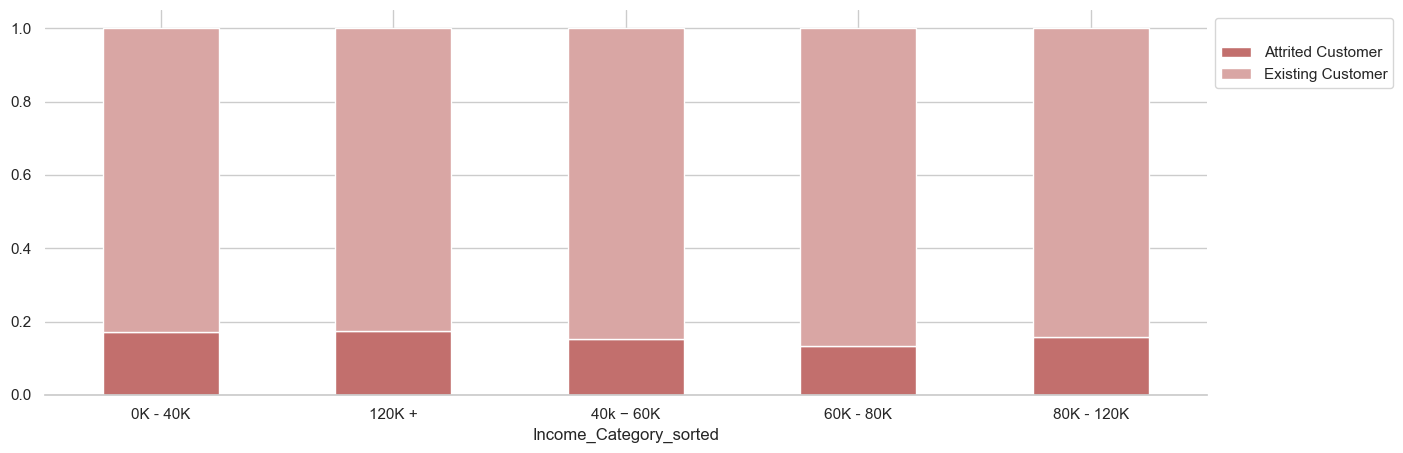

Attrition_Flag,Attrited Customer,Existing Customer,All
Card_Category_sorted,,,
Blue,1519,7917,9436
Gold,21,95,116
Platinum,5,15,20
Silver,82,473,555
All,1627,8500,10127


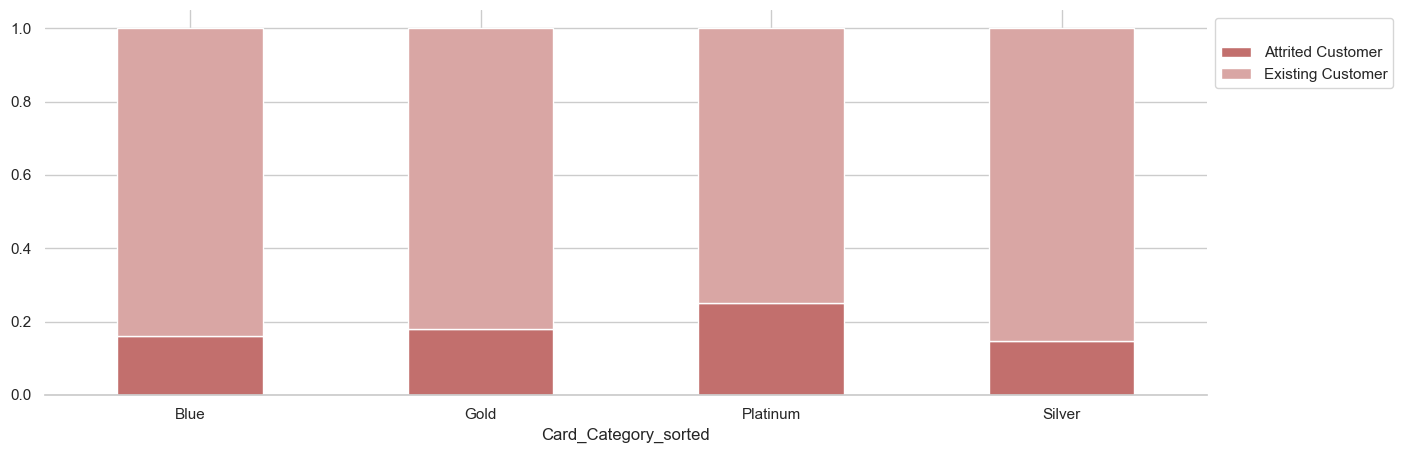

Attrition_Flag,Attrited Customer,Existing Customer,All
Dependent_count,,,
0,135,769,904
1,269,1569,1838
2,417,2238,2655
3,482,2250,2732
4,260,1314,1574
5,64,360,424
All,1627,8500,10127


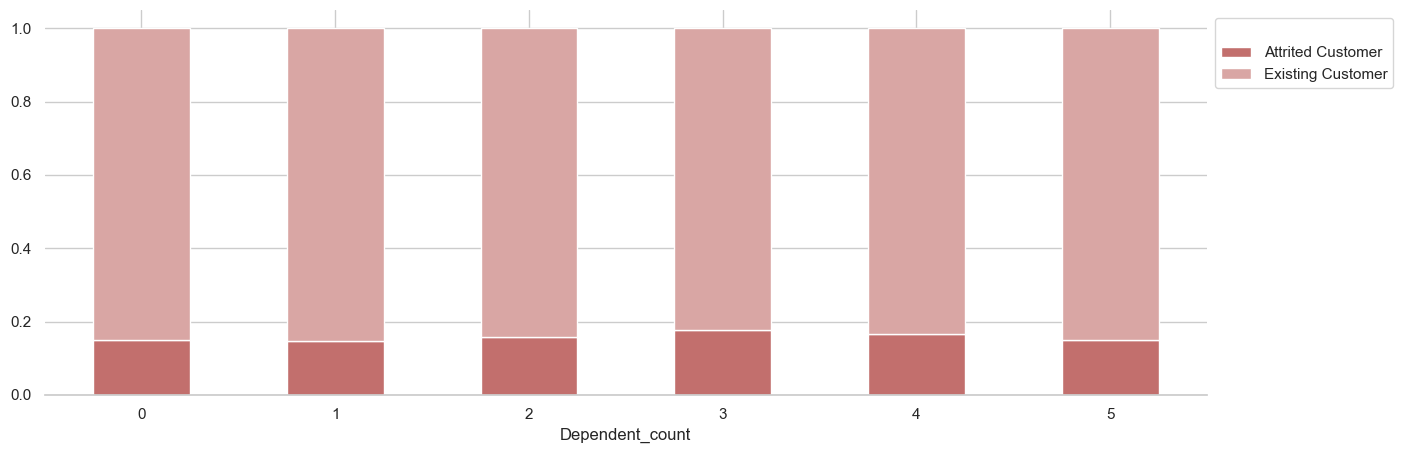

Attrition_Flag,Attrited Customer,Existing Customer,All
Total_Relationship_Count,,,
1,233,677,910
2,346,897,1243
3,400,1905,2305
4,225,1687,1912
5,227,1664,1891
6,196,1670,1866
All,1627,8500,10127


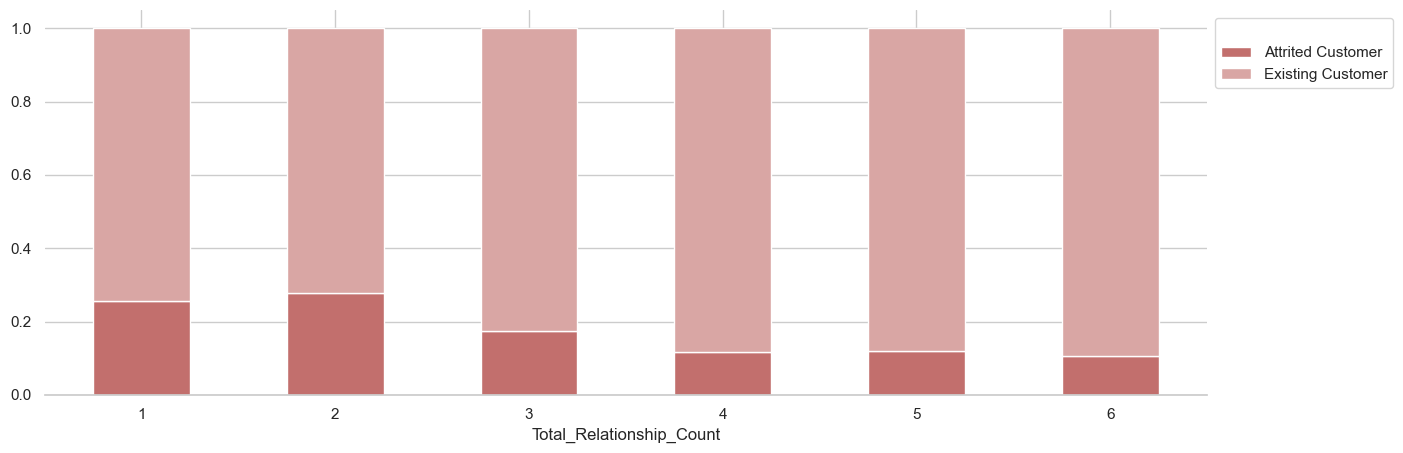

Attrition_Flag,Attrited Customer,Existing Customer,All
Months_Inactive_12_mon,,,
0,15,14,29
1,100,2133,2233
2,505,2777,3282
3,826,3020,3846
4,130,305,435
5,32,146,178
6,19,105,124
All,1627,8500,10127


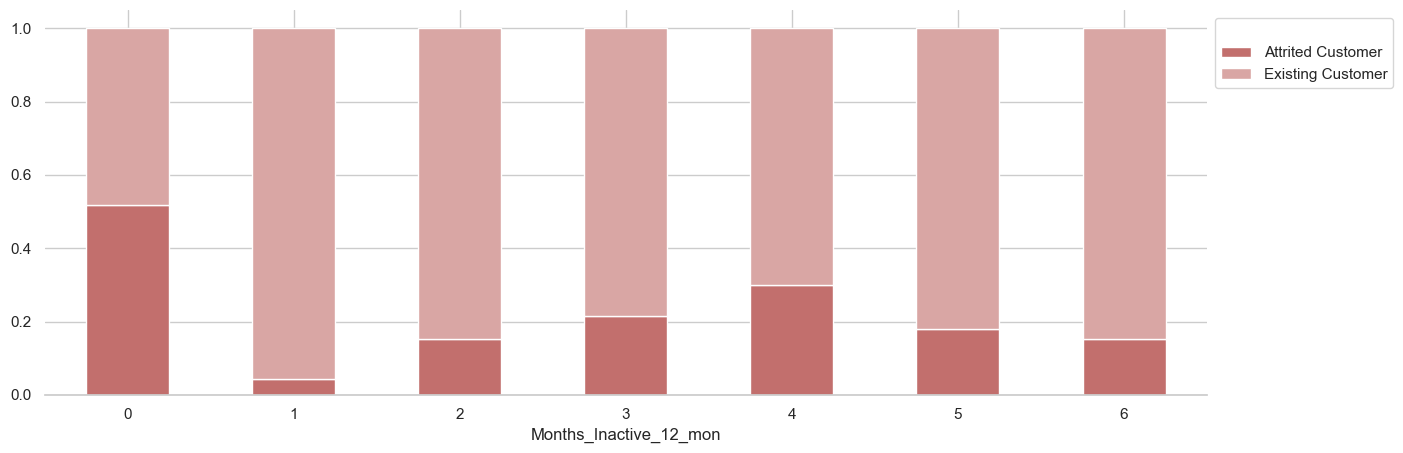

Attrition_Flag,Attrited Customer,Existing Customer,All
Contacts_Count_12_mon,,,
0,7,392,399
1,108,1391,1499
2,403,2824,3227
3,681,2699,3380
4,315,1077,1392
5,59,117,176
6,54,0,54
All,1627,8500,10127


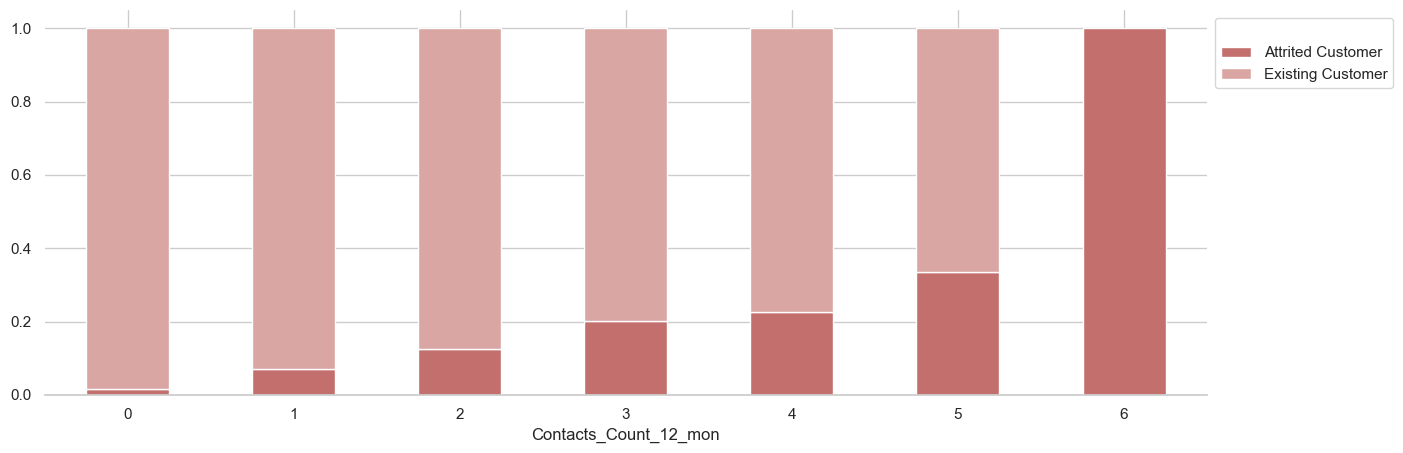

In [28]:
cat_cols = ['Attrition_Flag','Gender_Encoded', 'Education_Level_sorted', 'Marital_Status_sorted', 'Income_Category_sorted', 'Card_Category_sorted','Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon','Contacts_Count_12_mon']
for cols in cat_cols:
       stacked_plot(ccattr_data[cols])

* Customers who earned more than 120k and less than 40k.
* Customers with 3 dependent attrited more.
* Customers who were single attrited more
* Customers having 1 or 2 bank products churned more customers compared to customers with more bank products.
* Customers who were doctorate or postgraduate attrited most.
* Customers with platinum cards churned more but there are only 20 samples so this is inclusive.
* Customers who were never inactive churned most.Customers who were inactive for 4 months attrited most followed by 3 month and 5 month.
* Customers who were contacted most in the last 12 months attrited.Did bank had any information about there attrition which was a reason bank was contacting those customers so many times.? or so much contact from the bank leads to attrition


 ## Feature correlation heatmap<a id='Feature_correlation_heatmap'></a>

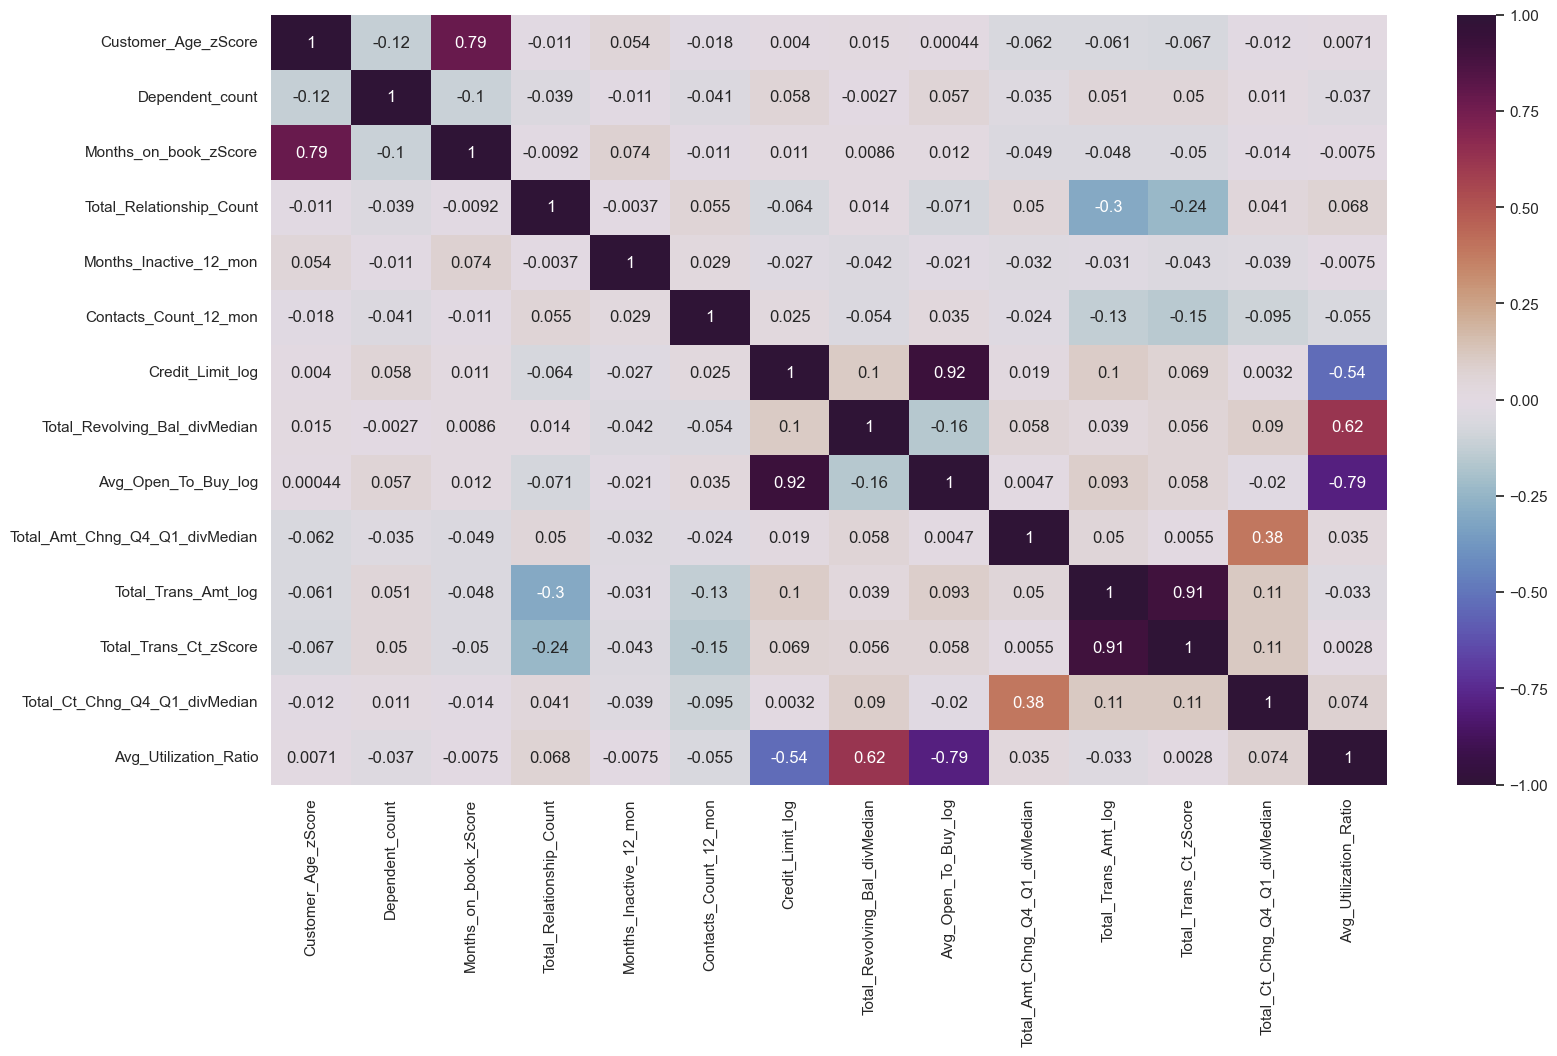

In [29]:
#ccattr_data.corr()
fig, ax = plt.subplots(figsize=(18,10))
list_cols = ['Customer_Age_zScore','Dependent_count', 'Months_on_book_zScore',
             'Total_Relationship_Count', 'Months_Inactive_12_mon',
             'Contacts_Count_12_mon', 'Credit_Limit_log', 'Total_Revolving_Bal_divMedian',
             'Avg_Open_To_Buy_log', 'Total_Amt_Chng_Q4_Q1_divMedian', 'Total_Trans_Amt_log',
             'Total_Trans_Ct_zScore', 'Total_Ct_Chng_Q4_Q1_divMedian', 'Avg_Utilization_Ratio']
    
sns.heatmap(ccattr_data[list_cols].corr(),cmap="twilight_shifted",annot=True,vmin=-1, vmax=1, center= 0,linewidths=3, linecolor='none',ax=ax)
plt.show()

* Customer age and Time frame with banks are highly correlated.
* Credit limit and Avg utilization ratio(how much of the available credit the customer spent) has some negative correlation.
* Total revolving balance (balance that carries over from one month to the next and average utilization (how much of the available credit the customer spent) are positively correlated.As expected.
* Average opening balance is negatively correlated to avg utilization ratio.
* There is very little correlation between total transfer amount and credit limit
* As expected there is very high correlation between total transfer amount and total transfer count.
* Credit limit and Average open to buy is fully correlated, we can drop one of them.
* Total_Trans_Ct and Total_Trans_Amt are close for fully correlation,.91, we can drop one of them.
* It is also logical that Total_Trans_Amt is correlated to Total_Amt_Chng_Q4_Q1,total ct_change_Q4_Q1.These features appear to be derived from Total_Trans_Amt. We can drop one of these columns


## Summary<a id='Summary'></a>

So dropping 
'Avg_Open_To_Buy_divMedian', 'Total_Trans_Ct_zScore','Total_Amt_Chng_Q4_Q1_divMedian','Total_Ct_Chng_Q4_Q1_divMedian'

So with this the final list of features for the pre-procesing shall be and Target is 'Attrition_Numeric'   

* Customer_Age_zScore
* Credit_Limit_log
* Total_Revolving_Bal_divMedian
* Total_Trans_Amt_log
* Avg_Utilization_Ratio
* Gender_Encoded
* Dependent_count
* Education_Level_sorted
* Marital_Status_sorted
* Income_Category_sorted
* Card_Category_sorted
* Months_on_book_zScore
* Total_Relationship_Count
* Months_Inactive_12_mon
* Contacts_Count_12_mon


Customer age and Time frame with bank are highly correlated.Though Female customer attrited more compared to male, but not much difference.Customers who were doctorate or postgraduate attrited most.Graduate and high schoolers stayed.Onthe contrary Customers who earned more than 120k attrited more. As expected there is very high correlation total transfer amount and total transfer count.Customer having 2 or 3 bank product attrited more compared to other customers with more bank products.Total transaction Amount has different distribution with data between 0 -2500 , 2500-5000, 750-10000 and then 12500-17500. To a surprise Customer who were contacted most in last 12 month attrited.

Creating New data frame with only feature that can be used for training.

In [30]:
Listing_cols = ['CLIENTNUM','Attrition_Numeric',
    'Customer_Age',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Total_Trans_Amt',
    'Avg_Utilization_Ratio',
    'Gender_Encoded',
    'Dependent_count',
    'Education_Level_sorted',
    'Marital_Status_sorted',
    'Income_Category_sorted',
    'Card_Category_sorted',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'naive_cls1',
    'naive_cls2']
ccattr_new_data = ccattr_data[Listing_cols]

In [31]:
ccattr_new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Numeric         10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Credit_Limit              10127 non-null  float64
 4   Total_Revolving_Bal       10127 non-null  int64  
 5   Total_Trans_Amt           10127 non-null  int64  
 6   Avg_Utilization_Ratio     10127 non-null  float64
 7   Gender_Encoded            10127 non-null  int64  
 8   Dependent_count           10127 non-null  int64  
 9   Education_Level_sorted    10127 non-null  object 
 10  Marital_Status_sorted     10127 non-null  object 
 11  Income_Category_sorted    10127 non-null  object 
 12  Card_Category_sorted      10127 non-null  object 
 13  Months_on_book            10127 non-null  int64  
 14  Total_

In [32]:
# Save the data 

datapath = '../data'

datapath_ccattr_step3 = os.path.join(datapath, '3.ccattr_data_EDA_final.csv')
#if not os.path.exists(datapath_ccattr_step3):
ccattr_new_data.to_csv(datapath_ccattr_step3, index=False)

## Original data

In [33]:
ccattr_data.head().T

,0,1,2,3,4
CLIENTNUM,714648933,717628608,711777633,716645883,708217758
Attrition_Flag,Existing Customer,Existing Customer,Existing Customer,Existing Customer,Existing Customer
Customer_Age,55,37,41,47,63
Gender,F,M,M,M,M
Dependent_count,3,3,3,2,2
Education_Level,Graduate,Unknown,Graduate,Unknown,Graduate
Marital_Status,Married,Married,Divorced,Unknown,Married
Income_Category,Unknown,$60K - $80K,$60K - $80K,$60K - $80K,$60K - $80K
Card_Category,Blue,Blue,Blue,Blue,Blue
Months_on_book,36,29,27,36,49


In [34]:
# Save the data 
datapath = '../data'

datapath_ccattr_step3 = os.path.join(datapath, '3.ccattr_data_EDA.csv')
ccattr_data.to_csv(datapath_ccattr_step3, index=False)

In [35]:
Listing_cols = ['CLIENTNUM','Attrition_Numeric',
    'Customer_Age',
    'Credit_Limit',
    'Total_Revolving_Bal',
    'Total_Trans_Amt',
    'Avg_Utilization_Ratio',
    'Gender',
    'Dependent_count',
    'Education_Level',
    'Marital_Status',
    'Income_Category',
    'Card_Category',
    'Months_on_book',
    'Total_Relationship_Count',
    'Months_Inactive_12_mon',
    'Contacts_Count_12_mon',
    'naive_cls1',
    'naive_cls2']
ccattr_new_rawdata = ccattr_data[Listing_cols]

In [36]:
ccattr_new_rawdata.head().T

,0,1,2,3,4
CLIENTNUM,714648933,717628608,711777633,716645883,708217758
Attrition_Numeric,0,0,0,0,0
Customer_Age,55,37,41,47,63
Credit_Limit,4861.0,2576.0,5784.0,13867.0,14035.0
Total_Revolving_Bal,1123,1640,0,0,2061
Total_Trans_Amt,1556,2568,4173,4297,1606
Avg_Utilization_Ratio,0.231,0.637,0.0,0.0,0.147
Gender,F,M,M,M,M
Dependent_count,3,3,3,2,2
Education_Level,Graduate,Unknown,Graduate,Unknown,Graduate


In [37]:
# Save the data 
datapath = '../data'

datapath_ccattr_step3 = os.path.join(datapath, '3.ccattr_data_rawdata.csv')
ccattr_new_rawdata.to_csv(datapath_ccattr_step3, index=False)